In [ ]:
!pip3 install py3nj

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for py3nj: filename=py3nj-0.2.1-cp310-cp310-linux_x86_64.whl size=44764 sha256=b5096f3b3db7b73e969cf5d339f6fa09cf8d539a96d6c1a48c3ef426114c2bd7
  Stored in directory: /root/.cache/pip/wheels/71/e9/70/30a34ed6dbc8b54ce93f25c091be4cf7a24319e27d953a882b
Successfully built py3nj


In [1]:
import multiprocessing
multiprocessing.cpu_count()

8

In [2]:
#from numba import jit,njit,prange
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sympy.physics.quantum.cg import CG, cg_simp
from sympy import S
from sympy import *
import matplotlib
from scipy.special import legendre
import math
from decimal import Decimal
from scipy.special import iv
import py3nj

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
#elp=1.186
#ec=np.sqrt(1-1/elp**2)

In [ ]:
#beam parameters
ec=0.4
FW=(13.579/60)#(9.66/60)#(13.579/60)
sigma=(math.pi/180)*(FW/np.sqrt(8*math.log(2)))
s=(((sigma)**4)/(1-np.square(ec)))**(1/4)

In [47]:
#ec_array=[0.35,0.4,0.42,0.46]   #for constant FW case
#FW=[13.579,13.579,13.579,13.579]

ec_array=[0.46,0.46,0.46,0.46]  #for constant ecentricity case
FW=[13.139,13.579,15.274,17.7036]
def get_s(F,ec):
    FW=(F/60)
    sigma=(math.pi/180)*(FW/np.sqrt(8*math.log(2)))
    s=(((sigma)**4)/(1-np.square(ec)))**(1/4)
    return s
S=[get_s(FW[i],ec_array[i]) for i in range(len(FW))]

In [4]:
def Pi_l(l):
    return np.sqrt(2*l+1)
def bl2(l_array,e,s):
    arr_val=[]
    for l in l_array:
        ep=math.exp(-(np.square(l+0.5)*(0.5*np.square(s))*(1-0.5*np.square(e))))
        p1=(np.sqrt((2*l+1)*(((l+2)*(l-1)*(l)*(l-1))/(4*math.pi)))*(((l+0.5)**(-2))))
        p3=np.square(l+0.5)*0.25*np.square(s)*np.square(e)
        bessel=iv(1,p3)
        val=p1*(bessel)*(ep)
        arr_val.append(val)
    return np.array(arr_val)
def bl0(l_array,e,s):
    arr_val=[]
    for l in l_array:
        ep=math.exp(-(np.square(l+0.5)*(0.5*np.square(s))*(1-0.5*np.square(e))))
        p1=(np.sqrt((2*l+1)/(4*math.pi)))
        p3=np.square(l+0.5)*0.25*np.square(s)*np.square(e)
        bessel=iv(0,p3)
        val=p1*(bessel)*(ep)
        arr_val.append(val)
    return np.array(arr_val)
def I_ll_02(l_array):
    arr_val=[]
    for l in l_array:
        val=np.sqrt((math.factorial(l-2))/math.factorial(l+2))*(((4*l)/(2*l+1))-(2*l*(l+1))/(2*l+1))
        arr_val.append(val)
    return np.array(arr_val)
def I_l_2l_02(l_array):
    arr_val=[]
    for l in l_array:
        val=np.sqrt((math.factorial(l-2))/math.factorial(l+2))*4#4*np.sqrt(1/((l+2)*(l+1)*l*(l-1)))#np.sqrt((math.factorial(l-2))/math.factorial(l+2))*4
        arr_val.append(val)
    return np.array(arr_val)
    #return val

def I_ll_m2_2(l,l2):#,m2):
    #m=np.abs(m2)
    arr_val=[]
    if l==l2:
        for m in range(1,l2+1):
            m2=m
            k=np.sqrt((l-1)*l*(l+1)*(l+2))
            k0=(np.square(m2)/(np.square(l)*np.square((l+1))))-((np.square(l)-np.square(m2))/(np.square(l)*(4*np.square(l)-1)))-((np.square((l+1))-np.square(m2))/(np.square((l+1))*(2*l+1)*(2*l+3)))
        #    k1=(2*m2)*((np.sqrt((np.square(l+1)-np.square(m2))))/(l*(l+1)*(l+2)*(2*l+1)))
        #    k_1=-((2*m2)*((np.sqrt(np.square(l)-np.square(m2))/(l*(np.square(l)-1)*(2*l+1)))))
            k2=(np.sqrt(((np.square(l+1)-np.square(m2))*(np.square(l+2)-np.square(m2)))))/((l+1)*(l+2)*(2*l+1)*(2*l+3))
            k_2=(np.sqrt((np.square(l)-np.square(m2))*(np.square(l-1)-np.square(m2))))/(l*(l-1)*(4*np.square(l)-1))

            val=(((k*k0)+(k*k2)*np.sqrt((((l-m+2)*(l-m+1))/((l+m+2)*(l+m+1))))
                    +(k*k_2)*np.sqrt(((l-m)*(l-m-1))/((l+m)*(l+m-1))))/m)*(((-1)**m))#*(2*l+1)/(4*math.pi))
            arr_val.append(val)

    if l2==(l-2):
        for m in range(1,l2+1):
            m2=m
            p=l-2
            k=np.sqrt((p-1)*p*(p+1)*(p+2))
            k0=(np.square(m2)/(np.square(p)*np.square((p+1))))-((np.square(p)-np.square(m2))/(np.square(p)*(4*np.square(p)-1)))-((np.square((p+1))-np.square(m2))/(np.square((p+1))*(p*2+1)*(p*2+3)))
        #    k1=(2*m2)*((np.sqrt((np.square(l+1)-np.square(m2))))/(l*(l+1)*(l+2)*(2*l+1)))
        #    k_1=-((2*m2)*((np.sqrt(np.square(l)-np.square(m2))/(l*(np.square(l)-1)*(2*l+1)))))
            k2=(np.sqrt(((np.square(p+1)-np.square(m2))*(np.square(p+2)-np.square(m2)))))/((p+1)*(p+2)*(2*p+1)*(2*p+3))
            k_2=(np.sqrt((np.square(p)-np.square(m2))*(np.square(p-1)-np.square(m2))))/(p*(p-1)*(4*np.square(p)-1))
            val=((k*k0)*np.sqrt(((l-m)*(l-m-1))/((l+m)*(l+m-1)))
            +(k*k2)
            +(k*k_2)*np.sqrt(((l-m)*(l-m-1)*(l-m-2)*(l-m-3))/((l+m)*(l+m-1)*(l+m-2)*(l+m-3))))/m*(((-1)**m))#*(2*l+1)/(4*math.pi))
            arr_val.append(val)
    if l==l2-2:
        for m in range(1,l2+1):
            m2=m
            p=l2
            k=np.sqrt((p-1)*p*(p+1)*(p+2))
            k0=(np.square(m2)/(np.square(p)*np.square((p+1))))-((np.square(p)-np.square(m2))/(np.square(p)*(4*np.square(p)-1)))-((np.square((p+1))-np.square(m2))/(np.square((p+1))*(p*2+1)*(p*2+3)))
        #    k1=(2*m2)*((np.sqrt((np.square(l+1)-np.square(m2))))/(l*(l+1)*(l+2)*(2*l+1)))
        #    k_1=-((2*m2)*((np.sqrt(np.square(l)-np.square(m2))/(l*(np.square(l)-1)*(2*l+1)))))
            k2=(np.sqrt(((np.square(p+1)-np.square(m2))*(np.square(p+2)-np.square(m2)))))/((p+1)*(p+2)*(2*p+1)*(2*p+3))
            k_2=(np.sqrt((np.square(p)-np.square(m2))*(np.square(p-1)-np.square(m2))))/(p*(p-1)*(4*np.square(p)-1))

            val=((((k*k0)*np.sqrt(((l-m)*(l-m-1))/((l+m)*(l+m-1)))
                +(k*k2)*np.sqrt((((l-m+2)*(l-m+1)*(l-m)*(l-m-1))/((l+m+2)*(l+m+1)*(l+m)*(l+m-1)))))
                +(k*k_2))/m)*(((-1)**m))#*(2*l+1)/(4*math.pi))
            arr_val.append(val)
    return np.array(arr_val)

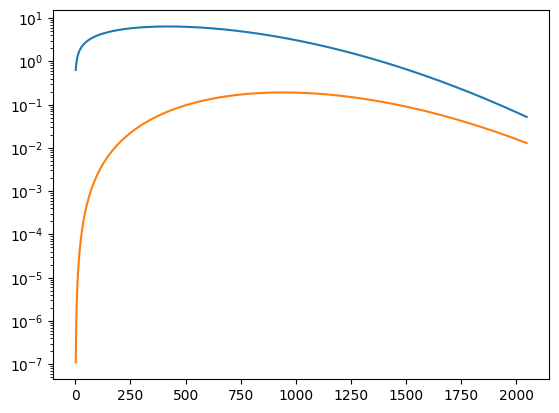

In [ ]:
plt.plot(np.arange(2,2048,1),bl0(np.arange(2,2048,1),ec,s))
plt.plot(np.arange(2,2048,1),bl2(np.arange(2,2048,1),ec,s))
plt.yscale('log')
plt.show()

In [5]:
def B_L0_ll(L,l,l2,e,s):
    L_array=np.array([L for i in range(len(l))])
    b=2*bl2(l2,e,s)
    constant=np.sqrt((2*l+1)*math.pi)
    if l[0]==l2[0]:
        #m2=[j for j in range(1,(l+1))]
        cg1=py3nj.clebsch_gordan(2*l,2*l,2*L_array,0,0,0)*I_ll_02(l2)#(((CG(l,0,l,0,L,0).doit()).doit()*I_ll_02(l)))
        #cg1=cg1.evalf()
        circ=((-1)**l)*bl0(l,e,s)*(2/(np.sqrt(2*l+1)))

    elif l[0]<l2[0]:
        #m2=[j for j in range(1,(l+1))]
        cg1=np.zeros(len(l))#py3nj.clebsch_gordan(2*l,2*l2,2*L_array,0,0,0)*I_l_2l_02(l2)#(((CG(l,0,l,0,L,0).doit()).doit()*I_l_2l_02(l)))
        #print('I1>>',I_l_2l_02(l2))
        #cg1=cg1.evalf()
        circ=np.zeros(len(l))

    else:
        #m2=[j for j in range(1,(l-2))]
        cg1=np.zeros(len(l))
        circ=np.zeros(len(l))
        #print(l)
        #print(l2)
    #sum=0
    #print('constant>>',constant)
    #print('cg1>>',cg1)
    #print('b>>',b)
    if L==0:
        sum2=[]
        for l2_index in l2:
            #if l2_index%100==0:
            #    print(l2_index,'done_for B00_ll')
            array_l2=np.array([l2_index for i in range(1,l2_index+1)])
            array_L=np.array([L for i in range(1,l2_index+1)])
            m2=np.array([m for m in range(1,l2_index+1)])
            sum2.append(np.sum(py3nj.clebsch_gordan(2*array_l2,2*array_l2,2*array_L,-2*m2,2*m2,0)*I_ll_m2_2(array_l2[0],array_l2[0])))#((-1)**m2)*
            #print(sum2)
        sum2=np.array(sum2)
        val=(constant)*(b*(cg1+2*sum2)+circ)
        '''for i in m2:
            cg2=((-1)**(i))*(CG(l,(-i),l2,i,L,0).doit()).doit()*I_ll_m2_2(l,l2,i)
            sum=sum+cg2
            sum=sum.evalf()
        val=(constant)*(b*(cg1+2*sum)+circ)'''

    else:

        sum2=[]
        id=0
        for l2_index in l2:

            array_l=np.array([l[id] for i in range(1,l2_index+1)])
            array_L=np.array([L for i in range(1,l2_index+1)])
            array_l2=np.array([l2_index for i in range(1,l2_index+1)])
            m2=np.array([m for m in range(1,l2_index+1)])
            #print('m2>>',m2)
            if array_l[0]<array_l2[0] and id<2:
                print(array_l[0],array_l2[0],array_L[0],m2[0])
                #    print(type(array_l[0]),type(array_l2[0]),type(array_L[0]),type(m2[0]))
            sum2.append(np.sum(py3nj.clebsch_gordan(2*array_l,2*array_l2,2*array_L,-2*m2,2*m2,0)*I_ll_m2_2(array_l[0],array_l2[0])))#((-1)**m2)*
            id=id+1
            #print('clebsch',py3nj.clebsch_gordan(2*array_l,2*array_l2,2*array_L,-2*m2,2*m2,0))
            #print('I2_arr>>',I_ll_m2_2(array_l[0],array_l2[0]))
            #print('cg2_arr>>',(py3nj.clebsch_gordan(2*array_l,2*array_l2,2*array_L,-2*m2,2*m2,0)*I_ll_m2_2(array_l[0],array_l2[0])))
            #print('sum2>>',(sum2))
        sum2=np.array(sum2)
        val=(constant)*b*(cg1+2*sum2)

        '''for i in m2:
            cg2=((-1)**(i))*(CG(l,(-i),l2,i,L,0).doit()).doit()*I_ll_m2_2(l,l2,i)
            sum=sum+cg2
            sum=sum.evalf()
        val=(constant)*b*(cg1+2*sum)'''

    return val

In [7]:
lmax=2048
l_array=np.array([j for j in range(2,lmax)])

In [ ]:
lmax=800
l_array=np.array([j for j in range(2,lmax)])
B00_ll=B_L0_ll(0,l_array,l_array,ec,s)
print('B00_ll done')
B20_ll=B_L0_ll(2,l_array,l_array,ec,s)
print('B20_ll done')
B20_ll2=B_L0_ll(2,l_array,l_array+2,ec,s)
print('B20_ll2 done')
B20_l2l=B_L0_ll(2,l_array+2,l_array,ec,s)
print('B20_ll_2 done')


B00_ll done
B20_ll done
2 4 2 1
3 5 2 1
B20_ll2 done
B20_ll_2 done


In [ ]:
B00_l2l2=B_L0_ll(0,l_array+2,l_array+2,ec,s)

In [8]:
def AL20_l1l2(l_array,ec,s,totCL):
    #l_array=np.array([j for j in range(2,lmax)])
    B00_ll=B_L0_ll(0,l_array,l_array,ec,s)
    print('B00_ll done')
    B20_ll=B_L0_ll(2,l_array,l_array,ec,s)
    print('B20_ll done')
    B20_ll2=B_L0_ll(2,l_array,l_array+2,ec,s)
    print('B20_ll2 done')
    B20_l2l=B_L0_ll(2,l_array+2,l_array,ec,s)
    print('B20_ll_2 done')
    B00_l2l2=B_L0_ll(0,l_array+2,l_array+2,ec,s)
    print('B00_l2l2 done')

    L_array=np.array([2 for i in range(len(l_array))])
    A20_ll=((-1)**l_array)*(2*np.sqrt(5))*totCL[2:lmax]*B00_ll*B20_ll/((Pi_l(l_array)**3)*py3nj.clebsch_gordan(2*l_array,2*l_array,2*L_array,0,0,0))

    A20_ll2=(((((-1)**l_array)*np.sqrt(5))/(Pi_l(l_array)*Pi_l(l_array+2)*py3nj.clebsch_gordan(2*l_array,2*(l_array+2),2*L_array,0,0,0)))
          *((totCL[2:lmax]*B00_ll*B20_l2l)/Pi_l(l_array) + (totCL[4:(lmax+2)]*B00_l2l2*B20_ll2)/Pi_l(l_array+2)))

    return [A20_ll,A20_ll2]




In [48]:
all=[]
all2=[]
for i in range(len(S)):
    output=AL20_l1l2(l_array,ec_array[i],S[i],totCL)
    all.append(output[0])
    all2.append(output[1])



B00_ll done
B20_ll done
2 4 2 1
3 5 2 1
B20_ll2 done
B20_ll_2 done
B00_l2l2 done
B00_ll done
B20_ll done
2 4 2 1
3 5 2 1
B20_ll2 done
B20_ll_2 done
B00_l2l2 done
B00_ll done
B20_ll done
2 4 2 1
3 5 2 1
B20_ll2 done
B20_ll_2 done
B00_l2l2 done
B00_ll done
B20_ll done
2 4 2 1
3 5 2 1
B20_ll2 done
B20_ll_2 done
B00_l2l2 done


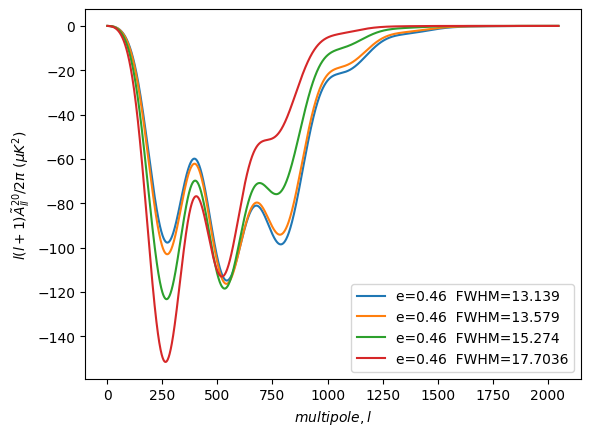

In [49]:
for i in range(len(S)):
    plt.plot(l_array,all[i],label='e='+str(ec_array[i])+'  FWHM='+str(FW[i]))
plt.ylabel(r'$l(l+1)\tilde{A}^{20}_{ll}/2\pi \,\, (\mu K^2)$')
plt.xlabel(r'$multipole,l$')
plt.legend()
plt.savefig('A_tilde_20_ll_constant_ec',bbox_inches='tight',dpi=800)
plt.show()

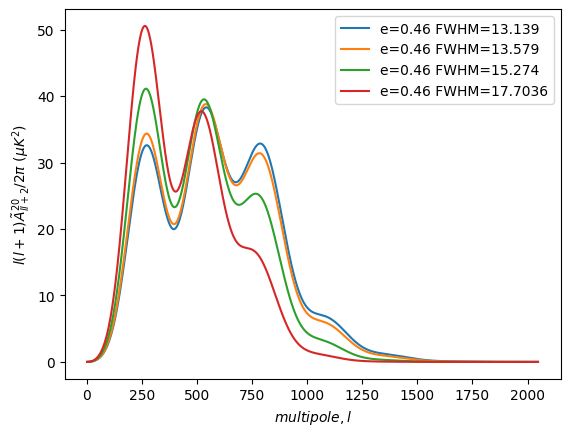

In [50]:
for i in range(len(S)):
    plt.plot(l_array,all2[i],label='e='+str(ec_array[i])+' FWHM='+str(FW[i]))
plt.ylabel(r'$l(l+1)\tilde{A}^{20}_{ll+2}/2\pi \,\, (\mu K^2)$')
plt.xlabel(r'$multipole,l$')
plt.legend()
plt.savefig('A_tilde_20_l_2l_constant_ec',bbox_inches='tight',dpi=800)
plt.show()

In [6]:
totCL = np.array([0.0, 0.0, 971.2570187674531, 920.0613179581726, 870.2274430198149, 832.6062605647847, 806.5668336086771, 789.7741492393271, 779.5003967716148, 774.4131864051577, 773.1577819673265, 774.4313423814959, 778.865844244216, 784.5849694684989, 791.4756581948751, 798.5158311745444, 807.3727267659277, 817.8961458207406, 828.9780968281331, 841.394848123115, 853.5448908885406, 866.1217978580523, 879.1482966284243, 892.237088026697, 905.7080289410229, 919.6951571974957, 933.708821371989, 948.1594783146782, 962.8791018896512, 977.7912400927214, 993.0931196295278, 1008.1800169571001, 1023.8569557808171, 1039.5924142484143, 1055.3629450013423, 1071.7505956896832, 1087.8552063087711, 1104.1980520736015, 1120.8825333127813, 1137.81616998076, 1154.9262249279911, 1172.132623964963, 1189.4373670562507, 1206.8499736773636, 1224.4171057725916, 1242.200282605892, 1260.163562441624, 1278.289717157552, 1296.5531976029708, 1314.9433114852452, 1333.5162216944725, 1352.3316404123148, 1371.3371951987558, 1390.46177759317, 1409.6862770966907, 1429.0064392937218, 1448.5341814686442, 1468.3706953935339, 1488.473352049007, 1508.7549512336632, 1529.1951467186154, 1549.8009669774026, 1570.5775177694675, 1591.5424227033836, 1612.6984472032407, 1634.070640210337, 1655.696019132061, 1677.555483025113, 1699.6121859713971, 1721.821852089584, 1744.1550605965022, 1766.5900559357024, 1789.2397451344868, 1812.2172721776712, 1835.5317827055703, 1859.1849926354187, 1883.1325314433548, 1907.2496837160365, 1931.5216431379806, 1955.9930291886503, 1980.6861754003637, 2005.6255538120174, 2030.8219078990878, 2056.250978138746, 2081.910789653121, 2107.7919389376184, 2133.8896600594067, 2160.173167840402, 2186.6237432811604, 2213.25238101787, 2240.0626476919715, 2267.0650093925024, 2294.260386943266, 2321.66402917998, 2349.2689006695578, 2377.0902518997755, 2405.1210492571436, 2433.361688497924, 2461.819994808318, 2490.474081103232, 2519.3392032180673, 2548.4083331356496, 2577.6818724054706, 2607.1453671005474, 2636.79922121554, 2666.6364116028835, 2696.6499163000394, 2726.8327144970635, 2757.1703581450297, 2787.670685307442, 2818.3192500015975, 2849.1089376370924, 2880.0396712502466, 2911.103848424538, 2942.2938674605684, 2973.6021272941675, 3005.0284557627274, 3036.565252819851, 3068.1974904506155, 3099.924997638774, 3131.7401752347205, 3163.6354242277307, 3195.5957173220327, 3227.620883919147, 3259.70332500495, 3291.8280130945705, 3323.9947772359255, 3356.1885895701453, 3388.401850353011, 3420.6343879355095, 3452.871173703951, 3485.097410329111, 3517.321511470719, 3549.5224087082365, 3581.7013184804537, 3613.844600380353, 3645.9534706132486, 3678.0142886636972, 3710.0208424245884, 3741.9594915849275, 3773.8388811285304, 3805.6379429887015, 3837.3504662641726, 3868.9776689904616, 3900.49848486677, 3931.9141334906913, 3963.1961220439657, 3994.3382438849467, 4025.326865290428, 4056.1483539496708, 4086.7890791079976, 4117.227797277101, 4147.472235881079, 4177.507653185486, 4207.3341662612875, 4236.944466059221, 4266.346102578617, 4295.51691487593, 4324.464457967741, 4353.174004470148, 4381.638258080175, 4409.83506859401, 4437.757145364947, 4465.397200647205, 4492.73309292674, 4519.764968690434, 4546.478120679216, 4572.865272929496, 4598.919152399938, 4624.63248893491, 4649.99801521464, 4675.001038342127, 4699.649153168783, 4723.920243755361, 4747.807053374822, 4771.309756052879, 4794.413795124808, 4817.11253933793, 4839.392054836079, 4861.253266341524, 4882.689671956232, 4903.687343009339, 4924.247208952072, 4944.36277214903, 4964.020107719329, 4983.22014842882, 5001.948971132104, 5020.2075100192915, 5037.9892714149155, 5055.280333632648, 5072.081631886868, 5088.386673109874, 5104.181535827924, 5119.459726746742, 5134.229608996504, 5148.477260285773, 5162.203614568959, 5175.409605273566, 5188.096165239825, 5200.241941621787, 5211.862722653487, 5222.9444423045725, 5233.479901514404, 5243.446903648278, 5252.8529647803725, 5261.668458565672, 5269.9008997775045, 5277.53551755083, 5284.564968838042, 5291.019051873462, 5296.882994391897, 5302.164308859004, 5306.8779358546935, 5311.023959110946, 5314.609890654656, 5317.635814201568, 5320.08695690156, 5321.963402835079, 5323.265236406711, 5323.985114086412, 5324.115692847449, 5323.664486949576, 5322.616726264335, 5320.97992644587, 5318.761603941188, 5315.961847691689, 5312.573319174775, 5308.603537485268, 5304.0525943036455, 5298.9280106032475, 5293.222451593417, 5286.943440101228, 5280.09849983821, 5272.680298653446, 5264.68893352423, 5256.139358832623, 5247.016816176832, 5237.343689423273, 5227.11264944143, 5216.331224080399, 5204.999512981683, 5193.117615782323, 5180.700488658418, 5167.748230758279, 5154.260940729216, 5140.2535732375845, 5125.73365373201, 5110.693849902763, 5095.156541589811, 5079.114393785608, 5062.5823548911885, 5045.553002577268, 5028.033433815025, 5010.023231164382, 4991.536831483344, 4972.558955648605, 4953.104035187021, 4933.179070362388, 4912.798486723638, 4891.969278262707, 4870.713292335312, 4849.030087792209, 4826.941504976462, 4804.454523881859, 4781.576120777517, 4758.305839796612, 4734.650649591019, 4710.624943300806, 4686.228253488387, 4661.460108839258, 4636.327462527645, 4610.852120596984, 4585.02617190306, 4558.878843324752, 4532.402216333245, 4505.610653878171, 4478.525943782833, 4451.1475854495675, 4423.482503376708, 4395.545047283028, 4367.349563889277, 4338.895540355555, 4310.197317825027, 4281.269234869687, 4252.110770938337, 4222.736259906964, 4193.152605176952, 4163.381564873063, 4133.422610236396, 4103.282639165347, 4072.983404700366, 4042.531801750874, 4011.9272955657557, 3981.184206895723, 3950.3168553948494, 3919.324703011743, 3888.222067471151, 3857.0084089418647, 3825.705471844724, 3794.320143145567, 3762.859309087149, 3731.337247242884, 3699.7680892271705, 3668.15850128289, 3636.522577277104, 3604.874410318783, 3573.2132360145783, 3541.5605741651993, 3509.9230869488592, 3478.307435546847, 3446.7128517096, 3415.168279416548, 3383.6655196257493, 3352.2260853224775, 3320.856631309691, 3289.5563824471124, 3258.346846939219, 3227.234674470418, 3196.233941142989, 3165.343864315615, 3134.5710875468108, 3103.944537192788, 3073.448567158524, 3043.112099011249, 3012.9269100465253, 2982.91448836876, 2953.0740343781863, 2923.4196024722687, 2893.957815957371, 2864.6952953744676, 2835.646086838527, 2806.8093769911366, 2778.1992064195215, 2749.8147562885324, 2721.67006178978, 2693.7791555044682, 2666.141210781382, 2638.7628268810654, 2611.6506007336493, 2584.818555411376, 2558.273283564033, 2532.013947567876, 2506.04713638727, 2480.3794373969267, 2455.010008214524, 2429.945433593409, 2405.192297272745, 2380.7497538346774, 2356.624385617998, 2332.830202935774, 2309.366359245349, 2286.2469314701825, 2263.4788352669766, 2241.0616251526653, 2219.002284726212, 2197.315226884552, 2175.992580632556, 2155.0413330390065, 2134.468472733379, 2114.2735617442836, 2094.4561640287557, 2075.0232739909056, 2055.974459938286, 2037.3241492771892, 2019.0570585426738, 2001.1950486687545, 1983.7302699400366, 1966.669732182702, 1950.0130197886265, 1933.7597201257806, 1917.9242802841832, 1902.4914370053186, 1887.4756435007694, 1872.8690710032138, 1858.6787505070415, 1844.8968593439413, 1831.5304345484367, 1818.5865161106772, 1806.049861868647, 1793.9349458935228, 1782.2413883134914, 1770.9613835821553, 1760.1019854414512, 1749.6628217783027, 1739.6360945285062, 1730.0214362788865, 1720.825910167987, 1712.049153086597, 1703.6759472301183, 1695.7133617552793, 1688.1610392886466, 1681.018624191606, 1674.270905780912, 1667.93238835861, 1661.9878643467841, 1656.4369843350246, 1651.2794003358993, 1646.5073374013787, 1642.1278786515493, 1638.1332518633415, 1634.523114523148, 1631.2972165570377, 1628.4482452059262, 1625.976408566686, 1623.8819162273517, 1622.1501226304727, 1620.781240549784, 1619.7754844767367, 1619.125642368056, 1618.817075753652, 1618.8648616050928, 1619.23950895877, 1619.9560992520492, 1621.007431310604, 1622.3863065440914, 1624.0781007449932, 1626.0979059919107, 1628.423675651061, 1631.0630796826895, 1634.0015063426079, 1637.2466324347938, 1640.7838533575168, 1644.6059966471976, 1648.720750465506, 1653.1135219777307, 1657.777150875004, 1662.7119094860252, 1667.8957894772475, 1673.3439287445647, 1679.026899637873, 1684.9449925277277, 1691.0985024546592, 1697.4728724645759, 1704.0758353810338, 1710.885415359268, 1717.9093546785136, 1725.14054361523, 1732.5718771027568, 1740.1962546750026, 1748.0140087451778, 1756.0106194686755, 1764.178999693068, 1772.5046381430666, 1780.987884343618, 1789.6142350789316, 1798.3766192918188, 1807.2679695715478, 1816.281221982511, 1825.4241725850543, 1834.6823354973928, 1844.048656103806, 1853.52355417954, 1863.107625306836, 1872.7792256538678, 1882.5389985499005, 1892.3727325305547, 1902.273646186787, 1912.2349596158394, 1922.242465876371, 1932.281959149416, 1942.3689479565487, 1952.4743714820147, 1962.6211679590635, 1972.7802776088429, 1982.9746393964067, 1993.1751939905166, 2003.3974521915882, 2013.6272113157463, 2023.8502684946372, 2034.0672772872224, 2044.2640342027296, 2054.4263353377655, 2064.554833026007, 2074.6353223987803, 2084.668454759687, 2094.6474525191356, 2104.572965891217, 2114.430787849819, 2124.2289958964984, 2133.968238685044, 2143.6268793546033, 2153.2204223724016, 2162.719801727784, 2172.1330928367443, 2181.4460857955814, 2190.6445704900093, 2199.7366217058025, 2208.7080290875288, 2217.552010598921, 2226.27664093045, 2234.8677098021794, 2243.3258637647573, 2251.6517495431967, 2259.8460140746347, 2267.901876188332, 2275.8125549777246, 2283.5786981631754, 2291.186097043664, 2298.6353998894588, 2305.9198268717123, 2313.0325983812204, 2319.966900209608, 2326.7232075180655, 2333.2945323933527, 2339.6813152418927, 2345.8914246956165, 2351.9104441043482, 2357.7462415185255, 2363.391827807395, 2368.840213217684, 2374.1066922718583, 2379.169416803666, 2384.0436792890036, 2388.715057513731, 2393.1839844879046, 2397.450891551671, 2401.5162081764392, 2405.3729334116883, 2409.014064029352, 2412.4474510167406, 2415.6586576172276, 2418.655529224444, 2421.431051425736, 2423.9782065006134, 2426.312258273919, 2428.4187534721486, 2430.312948340335, 2431.987810013093, 2433.4437297473783, 2434.681094413937, 2435.707714700114, 2436.5091115730893, 2437.1005146082857, 2437.474863427355, 2437.6250926522753, 2437.5664168735248, 2437.28433213016, 2436.7940426582877, 2436.0884624005575, 2435.1753567334245, 2434.0402007066045, 2432.7056058502467, 2431.1644650420217, 2429.4096659412057, 2427.4563760857504, 2425.304901199958, 2422.9481136155896, 2420.3937374045954, 2417.6420634206256, 2414.693377750882, 2411.5479618260756, 2408.2208774947544, 2404.697181814979, 2400.991569215256, 2397.1113016193044, 2393.0487802312, 2388.8038307231614, 2384.398560073586, 2379.8179299019403, 2375.069183405894, 2370.152132092606, 2365.081440957889, 2359.8420585082563, 2354.448643680681, 2348.908424202454, 2343.2063399943654, 2337.3570417179985, 2331.36774911128, 2325.2308227157514, 2318.9534773454016, 2312.53549709371, 2305.9840920816882, 2299.306470144793, 2292.502408509432, 2285.571682159661, 2278.5363488942376, 2271.38132252108, 2264.128656346761, 2256.7706880022633, 2249.3146095140587, 2241.7676105654155, 2234.13687845116, 2226.422169675945, 2218.623238247635, 2210.7546923164837, 2202.8162807093254, 2194.8077495627826, 2186.736270604795, 2178.616441085519, 2170.4331419576924, 2162.2083929622745, 2153.94192576271, 2145.633468935856, 2137.290176267375, 2128.911770002339, 2120.5128258540053, 2112.0930595686846, 2103.6521836007964, 2095.197335447159, 2086.735649290978, 2078.2668276566746, 2069.8053859057823, 2061.3359604497964, 2052.8877140072577, 2044.445236025205, 2036.015397897256, 2027.6124963417421, 2019.2285400921332, 2010.8778201026337, 2002.5671962637505, 1994.2812408305144, 1986.049093715214, 1977.8553224361365, 1969.7067774322538, 1961.6251638854283, 1953.5876151001569, 1945.6232612470517, 1937.7240893576745, 1929.8969419808104, 1922.1412323419452, 1914.4638012586868, 1906.8789173593286, 1899.37856390298, 1891.962152403183, 1884.6439512011625, 1877.4233722871268, 1870.3072565715281, 1863.2875890519854, 1856.3860691285781, 1849.5872556605154, 1842.9054223214916, 1836.3399876945589, 1829.890372161451, 1823.5708547835634, 1817.3734317221442, 1811.3049581513246, 1805.3722917091784, 1799.5748642883625, 1793.9121105162085, 1788.3908962234832, 1783.010661850878, 1777.7782792448802, 1772.68576669077, 1767.7548590863264, 1762.9627245001845, 1758.3311044245895, 1753.8594586621703, 1749.539822055154, 1745.379089555039, 1741.3767311815582, 1737.547077074587, 1733.874774070502, 1730.366864193812, 1727.030419532734, 1723.8650871789616, 1720.8779458982094, 1718.0537926956372, 1715.4071412313483, 1712.9376516808834, 1710.6449873969004, 1708.528814870469, 1706.5888036933839, 1704.8320548726406, 1703.2508157466693, 1701.8521933568986, 1700.635869371915, 1699.5941000674327, 1698.7340013627302, 1698.0626921121511, 1697.565009053185, 1697.2555052643293, 1697.126451727108, 1697.1775507487812, 1697.408507641961, 1697.819030762746, 1698.4162599074257, 1699.1924813164442, 1700.1474127879967, 1701.273347048292, 1702.584865230927, 1704.074266860997, 1705.73385499824, 1707.5633646859303, 1709.5699630551906, 1711.753392733798, 1714.0985436095352, 1716.6125946985694, 1719.29530086429, 1722.146421289278, 1725.1657195980092, 1728.3455356294128, 1731.6856422593542, 1735.1858171706292, 1738.8458429705456, 1742.6580789546747, 1746.6297462671257, 1750.7383579032175, 1755.0060023099472, 1759.4102032739484, 1763.9656318574218, 1768.6572513205715, 1773.484947797809, 1778.441426830293, 1783.5343169346472, 1788.7638240777674, 1794.107874999904, 1799.5889723790353, 1805.1850546282924, 1810.8963510367887, 1816.7305250457707, 1822.672960812365, 1828.7239049137443, 1834.8910379381518, 1841.1523326635322, 1847.5154807783379, 1853.9807510384303, 1860.5335608147893, 1867.1741893828255, 1873.902921101149, 1880.7126169322007, 1887.6035710059639, 1894.568653775756, 1901.608168568903, 1908.7224230813626, 1915.9043008679232, 1923.1541178795703, 1930.464765597186, 1937.836567564446, 1945.2698508690619, 1952.742660923496, 1960.2701880992483, 1967.8453407588113, 1975.4536017925868, 1983.1027418595406, 1990.785677479568, 1998.4878992319932, 2006.2246133603248, 2013.9738864793412, 2021.7435005929951, 2029.526382865327, 2037.3154622005113, 2045.103669129814, 2052.891364056446, 2060.6789088076976, 2068.4518098446815, 2076.2104315814186, 2083.94771125994, 2091.664015584251, 2099.352283960673, 2107.0128851462696, 2114.6387605029918, 2122.222884390785, 2129.758360380087, 2137.2531816785695, 2144.7004856248896, 2152.0934103698955, 2159.425094860699, 2166.7109638781426, 2173.9367295736993, 2181.102961560783, 2188.2028018542173, 2195.236821560585, 2202.198164166432, 2209.0874022255734, 2215.8902522924855, 2222.607288304061, 2229.239084855776, 2235.771360473083, 2242.2121193291614, 2248.539652753673, 2254.769394338995, 2260.8870647349218, 2266.88581333943, 2272.7736465806197, 2278.5362860890414, 2284.174310364159, 2289.695726330795, 2295.0936841864623, 2300.368762341546, 2305.5215389498985, 2310.545163430969, 2315.4476413846537, 2320.2146926961327, 2324.854321485785, 2329.3522458488146, 2333.709039440813, 2337.910417904764, 2341.964380444588, 2345.864067891075, 2349.5951908649026, 2353.173171336943, 2356.5837156323564, 2359.834812686261, 2362.9195920950183, 2365.838608968973, 2368.584987034212, 2371.1667034866937, 2373.584303746832, 2375.830901267611, 2377.914462397047, 2379.828092793302, 2381.572305414493, 2383.1549696992406, 2384.5616486460876, 2385.8001856382684, 2386.856134191137, 2387.7224712105503, 2388.399596859193, 2388.8879060820564, 2389.180360141699, 2389.2773432143676, 2389.179233945735, 2388.9012620679423, 2388.436366575557, 2387.792337414767, 2386.976958731527, 2385.9905804805726, 2384.826118395157, 2383.4839106675345, 2381.9568612384087, 2380.237868146757, 2378.31982353863, 2376.2030420349706, 2373.8804040569535, 2371.359640910291, 2368.6484781254244, 2365.747207154463, 2362.663542124739, 2359.397763196509, 2355.965001676405, 2352.3655266828673, 2348.599601916128, 2344.6600573797523, 2340.5397178042754, 2336.246259421966, 2331.765068290029, 2327.088953765575, 2322.2255769286894, 2317.1825939530067, 2311.945371123684, 2306.5438400554917, 2300.9707859025234, 2295.2338458685576, 2289.3332242106885, 2283.2914056901063, 2277.086300464755, 2270.732955981865, 2264.216701860194, 2257.5451483708603, 2250.711044709709, 2243.707135715971, 2236.5483911252104, 2229.2272680436076, 2221.751020133337, 2214.119468369951, 2206.35471443639, 2198.441713909786, 2190.402559748928, 2182.237055473862, 2173.945000195299, 2165.526188590896, 2156.9878392298983, 2148.3223094955038, 2139.5442373085175, 2130.6459709981514, 2121.6272826758573, 2112.502796559551, 2103.257418847861, 2093.898336150032, 2084.432730416336, 2074.8529222223597, 2065.16608415898, 2055.37938412561, 2045.4851286287312, 2035.4979045379678, 2025.4174373459193, 2015.2508762366735, 2004.9979374101279, 1994.6806175152174, 1984.2837668878174, 1973.8219447508272, 1963.2874208183557, 1952.6947454613935, 1942.0361796787984, 1931.311408579115, 1920.5275414696935, 1909.6842552535143, 1898.7812228848354, 1887.8329701829584, 1876.8243058516152, 1865.777176759443, 1854.683812922938, 1843.5512977497683, 1832.3792831360054, 1821.1822746705773, 1809.9450616926797, 1798.6895726076305, 1787.4080199023665, 1776.1074704182479, 1764.7949888248445, 1753.4702094463473, 1742.1327312964931, 1730.7968744774032, 1719.462067439947, 1708.1277373580458, 1696.8007386583333, 1685.4804964978214, 1674.1812919910326, 1662.8951206327952, 1651.6288342207079, 1640.3818559722781, 1629.1610373895564, 1617.9732300688459, 1606.8178575058728, 1595.6943435965936, 1584.6021127825998, 1573.5554468916362, 1562.5463435207907, 1551.574229566208, 1540.653389696235, 1529.783253067445, 1518.9558217860417, 1508.1853844141854, 1497.478802668584, 1486.8206548139826, 1476.2326625537276, 1465.7068359608704, 1455.250043658073, 1444.8691561908408, 1434.5636177466672, 1424.3328745706804, 1414.1763750274197, 1404.1084263598902, 1394.1210529940531, 1384.2211383434324, 1374.4081398097765, 1364.6815171832122, 1355.0481610413408, 1345.5075360969608, 1336.0665379466095, 1326.7172080680912, 1317.4738756206573, 1308.328587393475, 1299.288249608262, 1290.3523429216762, 1281.5277791810308, 1272.8066164311251, 1264.2032007256887, 1255.7095960889144, 1247.3252979825036, 1239.0646617251232, 1230.9197698793898, 1222.8901729259653, 1214.982862145368, 1207.1899755838874, 1199.5259398905198, 1191.9829003042887, 1184.5678624973134, 1177.2729792684254, 1170.105264041366, 1163.0717342637954, 1156.1645548083227, 1149.3907514767225, 1142.7499260537327, 1136.2416847628015, 1129.8656383721163, 1123.6214023007522, 1117.5160250747288, 1111.5417033812791, 1105.705495573611, 1100.0070367221833, 1094.43853871453, 1089.0070754031553, 1083.712297648778, 1078.5612901112306, 1073.5388579348003, 1068.6520969316007, 1063.908108607804, 1059.299143534852, 1054.824886466287, 1050.4924563978714, 1046.2941215706965, 1042.2295845692645, 1038.298554011816, 1034.5081729342073, 1030.8507337656893, 1027.3259633989667, 1023.9410232022273, 1020.6882239730951, 1017.5673109867818, 1014.5780356359784, 1011.720155413834, 1009.0008622401543, 1006.4050690294855, 1003.9474081052999, 1001.6128043540199, 999.4084736266616, 997.3342092819039, 995.3898104749234, 993.5676537406036, 991.874977973007, 990.2967873200784, 988.8479837205595, 987.5138058543124, 986.301782786481, 985.1971637773939, 984.2149166435864, 983.3403008634042, 982.5808659351325, 981.9367378815957, 981.3931908051469, 980.9652168944741, 980.6380995283579, 980.411983283763, 980.3018738436139, 980.2856394543255, 980.3782943393911, 980.5800001607927, 980.8760659344587, 981.2740896994777, 981.774245037727, 982.3692809972877, 983.0593787192424, 983.8298663161506, 984.6957889057182, 985.6350533936337, 986.662711914012, 987.7641066178454, 988.9394397178299, 990.2037734341498, 991.5350314907704, 992.9482825680125, 994.4288851021502, 995.9919140407486, 997.6227339951909, 999.3289976478154, 1001.0960756063243, 1002.9167697608574, 1004.8061699403642, 1006.749655416152, 1008.7400366074843, 1010.7849833848472, 1012.877311620265, 1015.0098398370396, 1017.1976742073124, 1019.4262100443457, 1021.6957018449452, 1024.006406526464, 1026.3585833605964, 1028.7450655529442, 1031.166116869122, 1033.6146076051198, 1036.090969453439, 1038.5956688156095, 1041.1291739594694, 1043.6770982206904, 1046.2473416510786, 1048.8329491593918, 1051.4343954492083, 1054.0447282006703, 1056.6718529987088, 1059.3088198048918, 1061.95610787658, 1064.6067689306012, 1067.261283703938, 1069.912705109714, 1072.5689431410267, 1075.2156229697207, 1077.8680832454497, 1080.5045207884198, 1083.140273934953, 1085.7609672267977, 1088.374509703359, 1090.966524640043, 1093.54491948941, 1096.102743969842, 1098.6479033071696, 1101.1660163252143, 1103.664985390683, 1106.130426157104, 1108.577665864472, 1110.9923163880078, 1113.3748441936746, 1115.725713495315, 1118.0453861162523, 1120.3268930049248, 1122.570690805843, 1124.7772333846303, 1126.939543358122, 1129.0580686804744, 1131.1332541839417, 1133.165541475446, 1135.1479404885351, 1137.0808860917825, 1138.964809652147, 1140.8001389542774, 1142.579869775211, 1144.311850865634, 1145.989070484827, 1147.604513042404, 1149.1734440954135, 1150.6739808912907, 1152.1213680073872, 1153.501129977938, 1154.8285006668168, 1156.0889964338212, 1157.2829862079766, 1158.4182631122744, 1159.4803310405102, 1160.484403089373, 1161.4159747389367, 1162.282822288702, 1163.0778610920895, 1163.808858944286, 1164.468722668863, 1165.0577831565872, 1165.5763670033582, 1166.0247964982336, 1166.4033896110077, 1166.705031628839, 1166.9300318426951, 1167.0861235321556, 1167.1661788981353, 1167.1704940956388, 1167.1067892141589, 1166.9604948553808, 1166.7318938613885, 1166.4361212898282, 1166.0660226360465, 1165.6144388554774, 1165.0964913843493, 1164.4975836563083, 1163.8253995210805, 1163.0801898090879, 1162.2547722959414, 1161.3568167167791, 1160.3865596784299, 1159.3368046219082, 1158.2152068355165, 1157.0219883666018, 1155.7425096342695, 1154.3992678448842, 1152.977613454428, 1151.485176936817, 1149.9147270007552, 1148.2738839609824, 1146.5628346602455, 1144.7817607950906, 1142.9234105443004, 1140.9953836017967, 1138.9978461118174, 1136.930926569711, 1134.7946184979187, 1132.5963061134914, 1130.3210833702753, 1127.9837524194345, 1125.576825171677, 1123.107665067846, 1120.5762020529942, 1117.9823609570378, 1115.3260615308038, 1112.6072184877473, 1109.8331699015978, 1106.9963922086433, 1104.1042136673432, 1101.1565293716753, 1098.145801320591, 1095.0793435434246, 1091.957037128821, 1088.7861870097254, 1085.5592370017016, 1082.2834832973092, 1078.9587895127738, 1075.5850151393904, 1072.1620156480967, 1068.6896425971354, 1065.1751720927089, 1061.6184482012793, 1058.0118830643967, 1054.3701704161986, 1050.6857155997104, 1046.9583490865875, 1043.195326596438, 1039.3964725158703, 1035.5616083681823, 1031.6905529323485, 1027.7831223612513, 1023.8465586490966, 1019.8806730467393, 1015.8852745261559, 1011.8527415425782, 1007.8051638960724, 1003.7274876873794, 999.6269422256016, 995.5107550806044, 991.371295483028, 987.2083594728296, 983.0291699943125, 978.8409486381216, 974.6360590302122, 970.414291969336, 966.182837744247, 961.9413462141118, 957.6894385383567, 953.4341633704769, 949.1677118818267, 944.8971312351871, 940.6220396048086, 936.3494829461464, 932.0790783632731, 927.8030141757114, 923.5283350351906, 919.2620852905861, 914.9964523525588, 910.7384801596601, 906.4952125431662, 902.2514082421587, 898.0215394218545, 893.8052216396832, 889.6020706146053, 885.4042739471378, 881.2337329425532, 877.0677791821927, 872.928314802316, 868.8001007193911, 864.6976118627047, 860.6130388054007, 856.5534296010268, 852.5184048206467, 848.5150143437974, 844.5354524007951, 840.5793427191123, 836.6537386215291, 832.765694776475, 828.8999822502099, 825.0710870637089, 821.2712118480988, 817.5074177049603, 813.7793392662982, 810.0866131569492, 806.428878107936, 802.813203421006, 799.2392323830711, 795.6991823815122, 792.2001300702899, 788.7417264342989, 785.3310536043967, 781.9603399202775, 778.6366734438661, 775.352288669155, 772.1217083824048, 768.9297447006711, 765.7834957783665, 762.6900627073422, 759.6416935311622, 756.6454967410168, 753.7011563162395, 750.8083601619305, 747.9668001922186, 745.1687440589552, 742.4361769774126, 739.7465182935846, 737.114333401953, 734.5393353538711, 732.013813262983, 729.5449174061255, 727.124945867443, 724.7684863297127, 722.4678460079103, 720.2227650803221, 718.0329883635324, 715.8982653328918, 713.8257784885944, 711.8078583162654, 709.843525509704, 707.9399766438246, 706.0947561330289, 704.3076415868811, 702.5784152968542, 700.906864224941, 699.2935228243441, 697.7381873524093, 696.2406586862252, 694.8007423010614, 693.418248246952, 692.0937339587134, 690.826275724552, 689.6164399987923, 688.4633120336102, 687.3667243553915, 686.3279995707233, 685.3454933271128, 684.419051294113, 683.5485234645408, 682.7345069612314, 681.9746318342525, 681.2702465492034, 680.6197324459092, 680.0237035584389, 679.4805495807844, 678.9901500188394, 678.5524123791323, 678.1666009554006, 677.8320080008506, 677.5479298281217, 677.3158952960836, 677.1329802771035, 676.9999788254648, 676.9162033158533, 676.8809700974316, 676.8928566430347, 676.9526728735043, 677.0590041315887, 677.2111825057079, 677.4085439779878, 677.6504284064966, 677.9361795064323, 678.2651448300267, 678.6366757449445, 679.0501274109423, 679.504115919541, 679.9987467716157, 680.5333863424411, 681.1059190141914, 681.7164613157995, 682.3636477095985, 683.0468590550322, 683.7654797289816, 684.5181547426815, 685.3035325251583, 686.121750538074, 686.9714638767291, 687.8505880424423, 688.7600130512554, 689.6976606835307, 690.6621985850993, 691.6537830245775, 692.6703446368545, 693.7120453482581, 694.7768212779245, 695.8633539860424, 696.9718132137886, 698.1001426100393, 699.2477738054366, 700.4126549685252, 701.5949648746214, 702.7926557871377, 704.0051675221423, 705.2304559959043, 706.4687072861219, 707.7178805065982, 708.977444952608, 710.2462207381835, 711.5252807594991, 712.8060421304106, 714.0992366308569, 715.3977688383516, 716.7019724021434, 718.0121815770954, 719.3213027586158, 720.6296710696207, 721.937621898238, 723.2529191377074, 724.5610416769073, 725.8697533954283, 727.1793896583458, 728.4754288640745, 729.7730624464194, 731.0651963259212, 732.3447358663205, 733.6268708337005, 734.8896485055923, 736.1482570873153, 737.3955988265473, 738.6320033336077, 739.850370802913, 741.0584569883014, 742.2565880794031, 743.4376606312178, 744.6019981965488, 745.7424945596771, 746.8743270736447, 747.9829581467661, 749.0687052842093, 750.1318843292516, 751.1802377567903, 752.2066495671953, 753.2040019325834, 754.1800318440942, 755.1276176584947, 756.0544924474464, 756.9535305452669, 757.8250325487768, 758.6767252665773, 759.4940482673612, 760.2772955803715, 761.0341872941274, 761.765012804556, 762.4552024129233, 763.1198973749752, 763.7445230459643, 764.3442181646324, 764.9044156037293, 765.4328331597538, 765.9297575604403, 766.3880444081158, 766.8079748228163, 767.1898270339503, 767.5413046718087, 767.8478233072386, 768.1245088435682, 768.3567706543727, 768.5522999746989, 768.7039280891188, 768.8193396719971, 768.8913593258746, 768.9276649221179, 768.9210741400038, 768.8792578084141, 768.7950264463128, 768.6686152559449, 768.5002557161921, 768.2901755275243, 768.0460269087353, 767.7531731441538, 767.4192586352641, 767.0444954519199, 766.6216632868295, 766.158394463233, 765.6548888436876, 765.1113421426132, 764.5205175412486, 763.8900307066472, 763.2126363620924, 762.4959416627863, 761.7326927729149, 760.9304882481692, 760.0820656197925, 759.1875864339574, 758.2546362440117, 757.2833679058663, 756.2665015775307, 755.2041814227919, 754.0965472677603, 752.9511629614965, 751.760731339163, 750.5253792901384, 749.2526577787578, 747.9352568175883, 746.5732905453843, 745.1742972573511, 743.7383652247696, 742.2580801917724, 740.733434653698, 739.1718454112972, 737.5732969136998, 735.9377696543015, 734.2652402183991, 732.5482529824044, 730.7942052157118, 729.0030620825454, 727.1747850461139, 725.3093319236519, 723.406656942429, 721.4667107965637, 719.4894407044853, 717.4822188171385, 715.4375572255394, 713.3628214202957, 711.2505169492142, 709.1005745266241, 706.9277784420661, 704.7171965169944, 702.4687502641597, 700.1972149451008, 697.8876495256803, 695.554823534622, 693.1912186677555, 690.7967422444516, 688.3787272624826, 685.929647401559, 683.4568304780555, 680.9527450971992, 678.4247141067564, 675.8800579487606, 673.3038096605907, 670.71071337821, 668.0857975853921, 665.4438019667621, 662.784607357242, 660.0969499681182, 657.3918490142044, 654.6676935189021, 651.9250990662401, 649.1639365127255, 646.3855605448877, 643.5905812273019, 640.7803497264727, 637.9547298604347, 635.1150694944708, 632.2619720926988, 629.396020292832, 626.519203681067, 623.6305197964451, 620.7311933557954, 617.8224478118117, 614.9040197476585, 611.9763874482511, 609.0407709680514, 606.0976465304282, 603.1474894337263, 600.1907741239521, 597.230202774165, 594.264762680215, 591.296411853491, 588.3263649248746, 585.3543503902889, 582.3815820328135, 579.4092733360144, 576.4371518985563, 573.4664308601562, 570.4975804834475, 567.5310710769228, 564.5673730837057, 561.607700006077, 558.6525228255218, 555.7030557633283, 552.7590278663695, 549.8216544382186, 546.8921514601169, 543.9702500117867, 541.0571677020839, 538.152637418978, 535.2586215941258, 532.374855281382, 529.5018175846125, 526.6407317443114, 523.7905938828673, 520.9541157687371, 518.1310393836642, 515.321851178578, 512.5270393175547, 509.7485794249426, 506.98547765026854, 504.23971342137435, 501.51029683494437, 498.7992114051385, 496.1069571195172, 493.43255050269136, 490.77798168765395, 488.14301462927915, 485.5281540768998, 482.9338895218862, 480.36145135469997, 477.80984399695205, 475.2803029575239, 472.77332353594403, 470.2894036984327, 467.82904411651657, 465.392748203297, 462.98027931241353, 460.5921464398824, 458.2296042537658, 455.89168178171457, 453.58038228185677, 451.29474058648304, 449.03602296938817, 446.80327015627705, 444.5977543539743, 442.4200079280051, 440.2690805839835, 438.1469963930303, 436.0520682907806, 433.9855836059229, 431.9480898975794, 429.9393949671096, 427.9593097043397, 426.00913376831727, 424.08868425750404, 422.1985242248208, 420.337734182294, 418.5076262857245, 416.70803016898935, 414.93877862345266, 413.19970760730405, 411.4906562549061, 409.8129525562233, 408.16569919112015, 406.548744878929, 404.96268438795533, 403.4073728749486, 401.88266872963715, 400.38917641921, 398.926017992597, 397.4938044297637, 396.0924071456014, 394.72095799858795, 393.38082063915755, 392.0711335073393, 390.7910383450403, 389.542651542669, 388.3236476268631, 387.134723112307, 385.975846833658, 384.84699095097574, 383.74813095111006, 382.67850281267874, 381.638831509638, 380.62835966805227, 379.64707606629554, 378.694972793298, 377.7720452398509, 376.87829208784393, 376.01297246231053, 375.17609158629216, 374.3676579282879, 373.5876831823169, 372.8354394104777, 372.1109446880505, 371.4134774059239, 370.7430619105126, 370.0997256359693, 369.4827562337572, 368.89218720465936, 368.32731218806543, 367.78817058876155, 367.2748046960892, 366.7857739655725, 366.3218691432791, 365.88239803756306, 365.46667113370194, 365.0747443713255, 364.70593341469237, 364.3595564260834, 364.03641967238605, 363.7351032848057, 363.4549325322456, 363.1967205882015, 362.95905428625304, 362.74200822470755, 362.5449161901099, 362.3671139200807, 362.20868186555117, 362.0689594474828, 361.9480306534144, 361.84449545877254, 361.7584410934076, 361.6892134631596, 361.63615991188084, 361.59937198396005, 361.5774568473848, 361.5705238081759, 361.57874430641675, 361.6000776056894, 361.6361981597436, 361.68506719533264, 361.74613249174337, 361.82032831648564, 361.9063611872434, 362.00442398550564, 362.1132245564276, 362.23295699036385, 362.36233022567524, 362.50228216822245, 362.6515226270245, 362.80950460157095, 362.97568139536503, 363.15024940081435, 363.3326623802754, 363.52163141829567, 363.717353379993, 363.91928236024626, 364.1268724738469, 364.33957781137354, 364.55759523072453, 364.77963580906214, 365.00589614032253, 365.23582978781286, 365.4696329120725, 365.70527288859563, 365.94294527569326, 366.1835881019209, 366.4244248130573, 366.66639257902045, 366.90894240479093, 367.15152475589355, 367.3935895130719, 367.6345859261257, 367.8747054018629, 368.1133957860096, 368.3493613141504, 368.58279106669085, 368.8138732476165, 369.0405666271394, 369.26454316853255, 369.48301678842137, 369.6976573216089, 369.90716211435733, 370.1102273070787, 370.30777628113276, 370.49924542463975, 370.68407489065225, 370.8617239804466, 371.03239847412027, 371.195559751531, 371.351410401012, 371.4986656529117, 371.63752465841014, 371.7674419234238, 371.88935575308903, 372.00123118161764, 372.10400259327315, 372.1963738189153, 372.2785322539629, 372.3506631324714, 372.4122066376961, 372.4633435193571, 372.5027665375686, 372.5306517538853, 372.5479156493161, 372.5525009044681, 372.5460618723995, 372.52727902350165,
372.495573083316, 372.45259066795643, 372.3962615720426, 372.3267414198622, 372.24492596916514, 372.1494797478278, 372.04055020868645, 371.91828204214556, 371.7820743267564, 371.632066187791, 371.4676511185988, 371.28896264489504, 371.0953886517112, 370.8885427231784, 370.6670642996242, 370.43107569247564, 370.1806964213259, 369.91604322328556, 369.6372300644296, 369.3436253181698, 369.0353374504956, 368.711729366751, 368.3743897700311, 368.02119050057945, 367.65297207174217, 367.2705723515564, 366.8718552451283, 366.4591390679824, 366.0310179989064, 365.5882826276969, 365.13097079535873, 364.65837500352904, 364.1705281083729, 363.66820334415746, 363.15068584136174, 362.6180011544397, 362.0701724488931, 361.50796335772304, 360.9306494970433, 360.3382469910508, 359.731512491092, 359.10971468880007, 358.4743485085701, 357.8246781139029, 357.1607082631655, 356.4831843244518, 355.79210661964646, 355.08747327287864, 354.3692802233441, 353.6375212376103, 352.89293075652967, 352.13475540174824, 351.3644681622326, 350.5805685604413, 349.7845253439574, 348.9763194869967, 348.1551870374665, 347.32259046962537, 346.4777616871727, 345.6214162124462, 344.7535246964066, 343.87479860488304, 342.9844617309791, 342.083964389104, 341.173269260317, 340.25159424951096, 339.3203838494811, 338.3795949916878, 337.42843990918595, 336.4683575067338, 335.49929921785315, 334.52047187427667, 333.53330908275234, 332.5370142539111, 331.53301765376233, 330.5205194372187, 329.5009467042322, 328.47349653791167, 327.43958184109067, 326.39908354162253, 325.3518699894497, 324.29855107248136, 323.23973544023266, 322.1752877292426, 321.10507146018546, 320.0296919364875, 318.949010639217, 317.8636309632632, 316.77341261443195, 315.6789573474821, 314.58012336472046, 313.4775110551676, 312.3717202289319, 311.2626073516752, 310.15077128405596, 309.036067680786, 307.9190947293154, 306.79970754776474, 305.67850392212944, 304.55608153741366, 303.4315523725828, 302.30551410436146, 301.1793073344598, 300.0520443101523, 298.92432315839267, 297.79674227296243, 296.6699003697904, 295.5429108702687, 294.41785896275695, 293.2938589716814, 292.1715114149001, 291.05067454374654, 289.93195005610573, 288.81594030233924, 287.7017626541425, 286.5907637165827, 285.48206235292645, 284.3770067279082, 283.2754601639495, 282.1772868408783, 281.0838374940803, 279.99423526602635, 278.9090899067257, 277.8290121278128, 276.7546136256326, 275.68427859833923, 274.62010644750654, 273.56122628369667, 272.50824911419926, 271.461767664781, 270.4208852576581, 269.3869348491364, 268.35976487436403, 267.3399677725061, 266.32665150211534, 265.3211537371583, 264.3225848783256, 263.33302792031765, 262.3501101244354, 261.3759170625197, 260.410307126219, 259.4531400574511, 258.5042769747127, 257.563580400324, 256.6323999586594, 255.7106010651474, 254.79730779128673, 253.8938742355858, 253.00017038006737, 252.1153249576462, 251.24069682521926, 250.37541798705206, 249.52085063890428, 248.67613019218035, 247.84187948355446, 247.01798030446417, 246.20431627063007, 245.40077285633484, 244.608723098384, 243.8273134543709, 243.0564351754912, 242.29598150340107, 241.54659053613793, 240.80890242285147, 240.08133088719484, 239.3652630995301, 238.6598598572088, 237.96576978344467, 237.28290084415343, 236.61190603796953, 235.95195490908426, 235.30296206808387, 234.66558720548227, 234.0397494329002, 233.42537012695863, 232.82237293574258, 232.23068378282892, 231.6509737038851, 231.08169212493817, 230.5242805619717, 229.97795891225593, 229.44343500209465, 228.91993323626795, 228.4081659254086, 227.90736193099008, 227.4174951533885, 226.94002734789257, 226.47345109364556, 226.01774678111101, 225.57363975271264, 225.140371771906, 224.71792950101965, 224.30704447278262, 223.9069645556836, 223.517682428536, 223.1391927141452, 222.77223478237744, 222.41532137760206, 222.06919559602431, 221.73385951255034, 221.40857414766796, 221.0948307744716, 220.79040820555414, 220.49605827560245, 220.21253446905266, 219.93836338324886, 219.67430170739092, 219.42036485186864, 219.17582691839607, 218.9399635059204, 218.71428018736944, 218.4973126369636, 218.28982644870754, 218.09110293541173, 217.90116760873607, 217.72004731993235, 217.54702740135323, 217.38213731375933, 217.22540778921953, 217.07687080964223, 216.93655958583955, 216.80302286699342, 216.67703909566288, 216.5586450478377, 216.4471358132644, 216.34255044589307, 216.2441862741877, 216.1520845513929, 216.0670386702907, 215.9876475070827, 215.91400487126947, 215.84620557936827, 215.78434543279826, 215.72777835996877, 215.6766020625786, 215.6309151558911, 215.59007430798127, 215.55417988295963, 215.5233330779614, 215.4961502238971, 215.47421976514806, 215.45615954762252, 215.4413309608261, 215.43132457353403, 215.42476025291523, 215.42100130264245, 215.42164009463505, 215.42455534929115, 215.43059760992566, 215.43987502569232, 215.45101047350084, 215.46485568905115, 215.48151988168888, 215.4996268534699, 215.5192862925792, 215.54060805593025, 215.56295928622595, 215.58719286866938, 215.61193320713852, 215.63803318541818, 215.66485994305998, 215.69178049644083, 215.71964735996585, 215.74708432236082, 215.7749434086222, 215.80259065718917, 215.8293917428996, 215.85619760066135, 215.88237303978974, 215.90728236940706, 215.93028935479126, 215.95298567988098, 215.97324822565832, 215.99266738020006, 216.00986148452674, 216.02419097012245, 216.0372439927363, 216.04689371731945, 216.05473083927944, 216.0593906506018, 216.06099740597122, 216.0596744190242, 216.05554403450162, 216.0479847667341, 216.03637410950165, 216.0215741821997, 216.0029603670896, 215.98064979290197, 215.95401564443387, 215.92317281329866, 215.88749220956046, 215.8478292494045, 215.80355249846912, 215.7540293260879, 215.70085439523913, 215.64190696782538, 215.57877924093125, 215.51009081805947, 215.4366885411473, 215.35867513761863, 215.27466637275538, 215.18550521240198, 215.09129047057036, 214.99063396219515, 214.88437466606777, 214.77260737253565, 214.6546826712588, 214.5306926089494, 214.40147067697387, 214.26562045875815, 214.1232297923161, 213.97512792252937, 213.8206569832892, 213.659900489718, 213.492197655218, 213.3183718836287, 213.13775941622924, 212.95043782397673, 212.7557403247281, 212.55448427574711, 212.34674265627623, 212.13184405545778, 211.9106011656659, 211.68233943106245, 211.44638270676805, 211.20428175358785, 210.95535721810802, 210.69967096370448, 210.43653777553163, 210.16674600823433, 209.88959408889932, 209.60512163289602, 209.31336660397747, 209.01510814543673, 208.70889523718563, 208.39624653919563, 208.07570771068333, 207.7487940908444, 207.41404802035623, 207.07298152446552, 206.72413363687025, 206.36827025017274, 206.00615561727736, 205.63632385397122, 205.25953595789875, 204.87655131345798, 204.48589919781682, 204.08907863826613, 203.68535858027306, 203.27400640679258, 202.85651645854114, 202.43215303995777, 202.0016646113004, 201.5635696312972, 201.11935642084566, 200.6682833370508, 200.211092968194, 199.747783649072, 199.2783523169477, 198.80279453292886, 198.32110450374356, 197.83327510385763, 197.34078356793094, 196.84139166829002, 196.33657408801884, 195.82706143380292, 195.3113545889869, 194.79018174691325, 194.26352709406197, 193.73137366834328, 193.1944462173977, 192.6527255518154, 192.10544856838916, 191.55407961344775, 190.99785349591934, 190.43674685062987, 189.87147816149601, 189.3012792796514, 188.72686060969676, 188.14816409666884, 187.56512461563656, 186.97767617221677, 186.38649476116274, 185.79076988500833, 185.19191875309818, 184.58838646053624, 183.9823315277837, 183.37219757506412, 182.75939886255418, 182.14312047051533, 181.5240325000919, 180.90131875927574, 180.27639096450693, 179.64843175742973, 179.0181089073662, 178.38460399901777, 177.74932663584912, 177.11071462363014, 176.47091951483108, 175.82837828798588, 175.18375605793415, 174.53846043622121, 173.89018455178132, 173.24107826739868, 172.59031986096073, 171.93857306738914, 171.28575860557916, 170.63105421059905, 169.9758660061224, 169.31937152668834, 168.6622339252559, 168.0043735005186, 167.34645339924023, 166.68839397832568, 166.02937283671096, 165.37079618706042, 164.71258471188182, 164.05465926439817, 163.39694089889093, 162.7400937355325, 162.0832964845285, 161.42795664981887, 160.77325354681722, 160.11910966967082, 159.4661907176548, 158.81441995072004, 158.1644638843189, 157.51550380826617, 156.8682035437383, 156.2224701418728, 155.57895039373483, 154.93680595194303, 154.2974275254769, 153.65923505337196, 153.02362040300383, 152.3904903772724, 151.7590095662498, 151.13057170323927, 150.5043426699706, 149.8809746865127, 149.26037782048886, 148.64246283595782, 148.02714120690186, 147.41506796544095, 146.80615604474238, 146.20031912684738, 145.5974716553844, 144.99827168328983, 144.40189238047876, 143.80973622183183, 143.2209779900855, 142.63627896423486, 142.0555584280273, 141.47873651889643, 140.90573424225298, 140.33647348619442, 139.77161987168677, 139.21109709813956, 138.65408695951245, 138.10200070100814, 137.55402202599672, 137.0108212886852, 136.47158417200885, 135.9369830461393, 135.40769131721947, 134.88215494140186, 134.3617922894082, 133.84653715597042, 133.3355816145795, 132.82960454233788, 132.32854313462806, 131.83159292472942, 131.3401791433109, 130.85424256237118, 130.3729823488958, 129.89634175299682, 129.42500812535002, 128.9589272638169, 128.4980474477649, 128.04232300337247, 127.59171076685227, 127.14691174849744, 126.70714263882732, 126.27236432348981, 125.84328189160665, 125.41911613747969, 125.00057490583502, 124.5876245901897, 124.1794901345368, 123.77688353830287, 123.37977534931963, 122.98813749503734, 122.60120044181787, 122.22042452748543, 121.84504294177191, 121.47503305518396, 121.10963073592943, 120.75030167525433, 120.39628436085236, 120.04756139892218, 119.70485949460739, 119.36667809091638, 119.03448919160246, 118.7067946574714, 118.38506886201415, 118.06855882072303, 117.75651266985334, 117.45040814452545, 117.14949554108924, 116.85376902937811, 116.56248095460538, 116.27711314935617, 115.99617706040401, 115.72115640115207, 115.45056444407294, 115.18514383906397, 114.92415241218201, 114.66907731543682, 114.41769232219097, 114.17148615405429, 113.93046261349956, 113.69388339791655, 113.46175375000787, 113.23407960449265, 113.01086757127015, 112.79212492005689, 112.57785956651962, 112.36808005991345, 112.16279983609353, 111.96130716472929, 111.76363801977573, 111.57057180903179, 111.38066002879398, 111.19542610502155, 111.01416554529428, 110.83691727707924, 110.66297797676248, 110.49313057458895, 110.32741575009511, 110.16513193310969, 110.00557814011424, 109.8502824808262, 109.69854514955983, 109.55040976666899, 109.40517770949727, 109.26289378291226, 109.12434621910046, 108.98883817142824, 108.85641621742778, 108.72712752049874, 108.60101982529783, 108.4773986166231, 108.35631278175968, 108.23855460104012, 108.12268839646084, 108.00950752860963, 107.89906304132444, 107.79140647939425, 107.68584703408052, 107.58243719155327, 107.48048703905569, 107.38153557905291, 107.28415085596474, 107.18912977115049, 107.09578387555733, 107.0041678406117, 106.91433658715106, 106.82634524763566, 106.7395062917206, 106.65461799045993, 106.57099303402843, 106.48868699348502, 106.40775544148927, 106.3275110722679, 106.24875216113703, 106.17079117851911, 106.09442608404882, 106.0182261055672, 105.94299173978898, 105.86879247540527, 105.79421480569435, 105.72155899446541, 105.6486678488424, 105.57635502901414, 105.50469083425251, 105.43300216589014, 105.36135816236231, 105.29057016637893, 105.21996318935273, 105.14886155341806, 105.0780745360324, 105.00766784213353, 104.93696358413135, 104.86602593476688, 104.79491827775087, 104.72370319629697, 104.65169962949338, 104.57971137160929, 104.50705572901094, 104.43379202496541, 104.36072160198887, 104.28641648660114, 104.2116764067027, 104.13581462589734, 104.05962929509083, 103.98243212575434, 103.90501974505189, 103.82595953719257, 103.7460466712818, 103.66533277991104, 103.58386881361749, 103.50096222578976, 103.41666266289096, 103.33101914959485, 103.24482294370563, 103.15663621543399, 103.06724907615853, 102.97670825593097, 102.8843171198451, 102.79086418802338, 102.69565180876394, 102.59872467500588, 102.50012699866073, 102.40064535280312, 102.2988373364067, 102.19548858688307, 102.08989860480344, 101.98285209123094, 101.87439006068212, 101.7638087034107, 101.65114617425554, 101.53644012068854, 101.42047050177253, 101.30178822946381, 101.18191499276037, 101.05940055417108, 100.93576540442872, 100.8095580548174, 100.68155485307966, 100.55104577743974, 100.41880574449544, 100.28412323579829, 100.14777160378051, 100.00978053192485, 99.86869316468271, 99.72602308255435, 99.58179725715044, 99.43455601698157, 99.28581002427433, 99.13484039763388, 98.98241285647079, 98.82706351692593, 98.67029871011995, 98.51139511234089, 98.34962822802059, 98.18650087548386, 98.02128616046156, 97.85474163806357, 97.68539512786101, 97.51400171775256, 97.34057242121628, 97.16511701342044, 96.98838687114089, 96.80890364140315, 96.62741626423957, 96.44467248407207, 96.25993319992679, 96.07245815948266, 95.88373449177695, 95.69376256321257, 95.50105601203394, 95.30709879611184, 95.11114538835236, 94.91393499512124, 94.71472026190226, 94.51349582631356, 94.31099836793723, 94.1064781546512, 93.89992484497726, 93.6928021105222, 93.48285611111459, 93.27228948984067, 93.05959024201269, 92.84547444912816, 92.62991499169455, 92.41214160097273, 92.1936122493025, 91.97281335330797, 91.75120250032002, 91.52726581194445, 91.30246066529722, 91.07601588587588, 90.84790312248333, 90.61883687862108, 90.38804603519641, 90.15624521464203, 89.92266346095138, 89.68875843096542, 89.45301656132821, 89.21615292173769, 88.97888271390094, 88.73969276648742, 88.50004137640738, 88.25915845592549, 88.0170168613782, 87.77433237829361, 87.53107803316985, 87.28648407224553, 87.04126644254886, 86.79539826028713, 86.5488526171371, 86.30234538466628, 86.05436384211012, 85.80636648826926, 85.55758316227968, 85.30872918429246, 85.05903398093206, 84.80921239135525, 84.55923612893287, 84.3090765842234, 84.0579619594767, 83.80734858022021, 83.55720669394387, 83.30602044658268, 83.05598770717765, 82.80559170042382, 82.5548008382394, 82.30506871001347, 82.0548747514178, 81.80565997711325, 81.55589124969366, 81.30700628286388, 81.05821380853385, 80.8102077689238, 80.56293883319451, 80.31561442385434, 80.06818441785416, 79.82208401719305, 79.57651961376932, 79.33069733864745, 79.08679445035175, 78.84253103655988, 78.59934125478806, 78.35643071075097, 78.11449069485172, 77.87346974090374, 77.63331652698805, 77.39323710787824, 77.15466632377125, 76.91681085949871, 76.67962065425573, 76.44304613600232, 76.20778112523816, 75.97303439752598, 75.73950108956737, 75.50713425801713, 75.27588777585862, 75.04497355575093, 74.81583294510466, 74.58767976711195, 74.36047170785885, 74.13416752380093, 73.90946991446434, 73.68633988496858, 73.46399677325498, 73.24314677684276, 73.02301162870154, 72.80429994749606, 72.58772157177823, 72.37175905322209, 72.1571246591665, 71.94416043656555, 71.73254105876877, 71.52246233675618, 71.31382407040867, 71.10674999766653, 70.90114205328119, 70.69712602504555, 70.49468005868962, 70.29385736976953, 70.0946377063687, 69.89707588566742, 69.70122744896051, 69.50700003124943, 69.3145989974544, 69.12393310872913, 68.93498587399377, 68.74788976769693, 68.56262903085988, 68.37926245798492, 68.19762620133794, 68.01792797968596, 67.84015275393622, 67.664211241239, 67.49016271650312, 67.31799211725007, 67.14775857074547, 66.97944679226038, 66.81304133931548, 66.6486008716941, 66.48603528346274, 66.32540282572681, 66.16676153474145, 66.01002066649146, 65.85516355530153, 65.70232191195323, 65.55133014373726, 65.40224536637743, 65.25505030360016, 65.10972761017044, 64.96625991710867, 64.8247041657736, 64.68489452942838, 64.54688817441514, 64.41074247393496, 64.27629222546258, 64.14359542278841, 64.01263619557952, 63.88339916840916, 63.75579525412517, 63.62995886544557, 63.50572800809784, 63.38309005890954, 63.26210755814543, 63.14269543294895, 63.02476963575887, 62.9083957795535, 62.793492068288984])


(-400.0, 400.0)

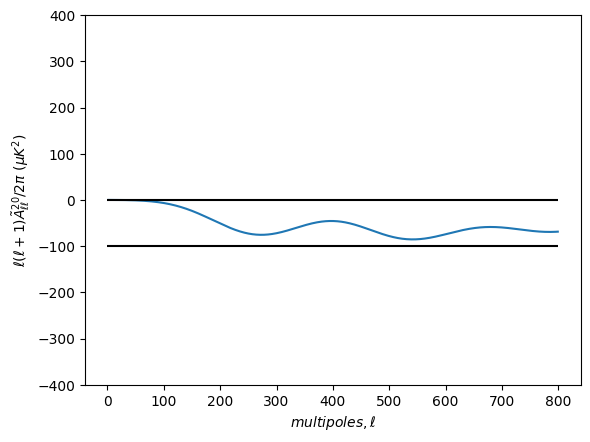

In [ ]:
#calculating A^20_ll
L_array=np.array([2 for i in range(len(l_array))])
A20_ll=((-1)**l_array)*(2*np.sqrt(5))*totCL[2:lmax]*B00_ll*B20_ll/((Pi_l(l_array)**3)*py3nj.clebsch_gordan(2*l_array,2*l_array,2*L_array,0,0,0))
plt.plot(l_array,A20_ll)
plt.hlines(0,0,lmax,colors='black')
plt.hlines(-100,0,lmax,colors='black')
plt.xlabel(r'$multipoles,\ell$')
plt.ylabel(r'$\ell(\ell+1)\tilde{A}^{20}_{\ell \ell}/2\pi \,\, (\mu K^2)$')
plt.ylim(-400,400)

Text(0, 0.5, '$\\ell(\\ell+1)\\tilde{A}^{20}_{\\ell \\ell+2}/2\\pi \\,\\, (\\mu K^2)$')

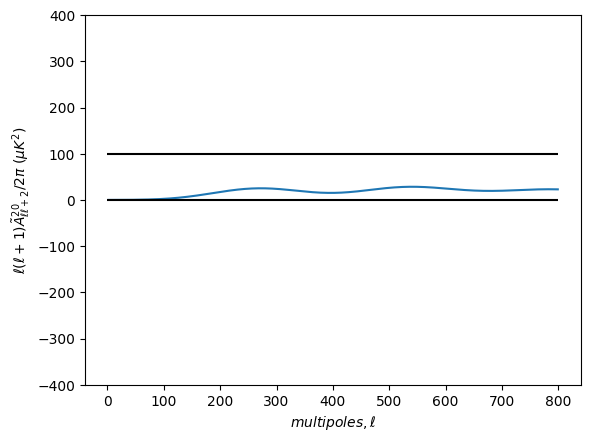

In [ ]:
#A^20_ll2
A20_ll2=(((((-1)**l_array)*np.sqrt(5))/(Pi_l(l_array)*Pi_l(l_array+2)*py3nj.clebsch_gordan(2*l_array,2*(l_array+2),2*L_array,0,0,0)))
          *((totCL[2:lmax]*B00_ll*B20_l2l)/Pi_l(l_array) + (totCL[4:(lmax+2)]*B00_l2l2*B20_ll2)/Pi_l(l_array+2)))
plt.plot(l_array,A20_ll2)
plt.hlines(0,0,lmax,colors='black')
plt.hlines(100,0,lmax,colors='black')
plt.ylim(-400,400)
plt.xlabel(r'$multipoles,\ell$')
plt.ylabel(r'$\ell(\ell+1)\tilde{A}^{20}_{\ell \ell+2}/2\pi \,\, (\mu K^2)$')
#np.sqrt(5))/(Pi_l(l_array)*Pi_l(l_array+2)*py3nj.clebsch_gordan(2*l_array,2*(l_array+2),2*L_array,0,0,0))

## **mBipoSH calculations**

In [51]:
#calculation of mBipoSH coefficients
#defining Legendre polynomials and their derivatives
from numpy.polynomial import legendre as L

def P_ln(l_iso,n,point,fact,all):
    p_sum=[0]
    for l in l_iso:
        coef1=np.zeros(shape=l+1)
        coef1[-1]=((all[(l-l_iso[0])]*fact[l-l_iso[0]]))/(2*(l*(l+1)))#*fact[l-l_iso[0]]

        poly = np.polynomial.legendre.Legendre(coef1)  # coefficients of n^th degree Legendre polynomial
        polyd= poly.deriv(n)

        p_sum = np.polynomial.legendre.legadd(polyd.coef, p_sum)
        #if l%100==0:
        #   print(coef1)
        #    print(polyd.coef)
        #    print((len(coef1)),(len(polyd.coef)))
        #    print(p_sum)

    #print(p_sum)
    val=L.legval(point,p_sum)
    return val

def P_l1n(l_iso,n,point,fact1,all):
    p_sum=[0]
    for l in l_iso:
        coef1=np.zeros(shape=(l+2))
        coef1[-1]=((all[(l-l_iso[0])])*fact1[l-l_iso[0]])*(1/(2*l*(l+1)))
        poly = np.polynomial.legendre.Legendre(coef1)  # coefficients of n^th degree Legendre polynomial
        polyd= poly.deriv(n)
        p_sum = np.polynomial.legendre.legadd(polyd.coef, p_sum)
    val=L.legval(point,p_sum)
    return val


def P_l2n(l_iso,n,point,fact1,all):
    p_sum=[0]
    for l in l_iso:
        coef1=np.zeros(shape=(l+3))
        coef1[-1]=((all[(l-l_iso[0])])*fact1[l-l_iso[0]])*(1/(2*l*(l+1)))
        poly = np.polynomial.legendre.Legendre(coef1)  # coefficients of n^th degree Legendre polynomial
        polyd= poly.deriv(n)
        p_sum = np.polynomial.legendre.legadd(polyd.coef, p_sum)
    val=L.legval(point,p_sum)
    return val

def P_l3n(l_iso,n,point,fact1,all):
    p_sum=[0]
    for l in l_iso:
        coef1=np.zeros(shape=(l+4))
        coef1[-1]=((all[(l-l_iso[0])])*fact1[l-l_iso[0]])*(1/(2*l*(l+1)))
        poly = np.polynomial.legendre.Legendre(coef1)  # coefficients of n^th degree Legendre polynomial
        polyd= poly.deriv(n)
        p_sum = np.polynomial.legendre.legadd(polyd.coef, p_sum)
    val=L.legval(point,p_sum)
    return val

In [52]:
import mpmath
def mBNC_fact1(l):
    mpmath.mp.dps = 50
    val= float((((-1)**(l))/(4*math.pi))*(np.sqrt(((10/3)*(2*l+1))/((2*l-1)*l*(l+1)*(2*l+3)))))
    return val

def mBNC_fact2(l):
    val= (((-1)**(l))/(4*math.pi))*(np.sqrt(5/(9*(l+2)*(2*l+3)*(l+1))))
    return val.astype(np.float64)
def mBNC_fact3(l):
    val= (((-1)**(l))/(4*math.pi))*(np.sqrt((4*(2*l+1))/((2*l-1)*l*(l+1)*(2*l+3))))
    return val.astype(np.float64)
def mBNC_fact4(l):
    val= (((-1)**(l))/(4*math.pi))*(np.sqrt(2/(3*(l+2)*(2*l+3)*(l+1))))
    return val.astype(np.float64)

fact1=[]
fact2=[]
fact3=[]
fact4=[]
l_iso=l_array
for i in l_iso:
    fact1.append(mBNC_fact1(i))
    fact2.append(mBNC_fact2(i))
    fact3.append(mBNC_fact3(i))
    fact4.append(mBNC_fact4(i))
fact1=np.array(fact1)
fact2=np.array(fact2)
fact3=np.array(fact3)
fact4=np.array(fact4)

In [53]:
theta = np.linspace( 0.1* np.pi / 180, 179.9 * np.pi / 180, 10000)
x = np.cos(theta)
theta_degree = theta * 180/ np.pi

In [54]:
alpha_0=[]
alpha_1=[]
alpha_2=[]


for i in range(len(S)):
    alpha_0.append((P_ln(l_iso,2,x,fact3,all[i])+P_ln(l_iso,2,x,fact4,all2[i])))
    alpha_1.append((P_ln(l_iso,1,x,(2*l_iso+1)*fact1,all[i])+P_l1n(l_iso,2,x,(fact1*(-2)),all[i])+
         P_l2n(l_iso,1,x,(4*l_iso+10)*fact2,all2[i])+P_l3n(l_iso,2,x,fact2*(-2),all2[i])))
    alpha_2.append((P_ln(l_iso,2,x,fact3,all[i])+P_l2n(l_iso,2,x,fact4,all2[i])))

<ipython-input-34-c64336a8e88a>:5: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,120)


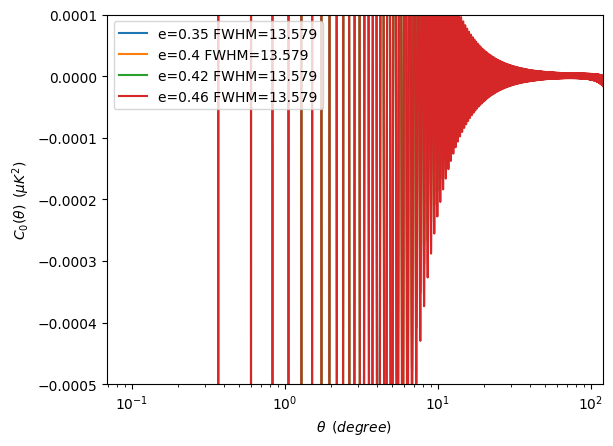

In [ ]:
plt.xscale('log')
for i in range(len(S)):
    plt.plot(theta_degree,alpha_0[i],label='e='+str(ec_array[i])+' FWHM='+str(FW[i]))

plt.xlim(0,120)
plt.ylim(-0.0005,0.0001)
plt.legend()
plt.xlabel(r'$\theta \,\,\, (degree)$ ' )
plt.ylabel(r'$C_0(\theta) \,\,\, (\mu K^2)$')
plt.show()

/tmp/ipykernel_28732/3932220144.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,120)


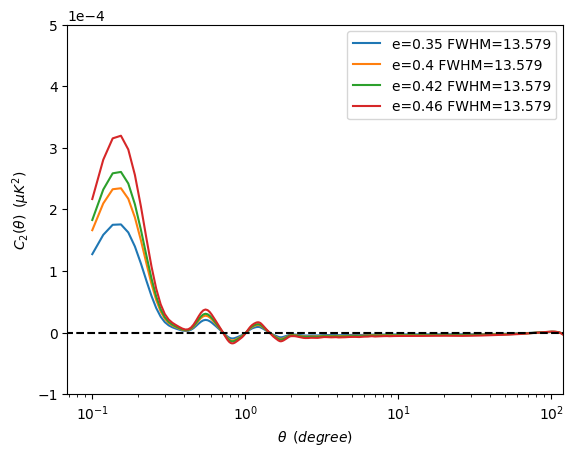

In [19]:
plt.xscale('log')
for i in range(len(S)):

    plt.plot(theta_degree,alpha_1[i],label='e='+str(ec_array[i])+' FWHM='+str(FW[i]))

#plt.xlim(175,180)
plt.xlim(0,120)
plt.ylim(-0.0001,0.0005)
#plt.ylim(-0.00001,0.0005)
plt.legend()
plt.xlabel(r'$\theta \,\,\, (degree)$ ' )
plt.ylabel(r'$C_2(\theta) \,\,\, (\mu K^2)$')
plt.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
plt.savefig('C_2_constant_FWHM',bbox_inches='tight',dpi=800)
plt.hlines(0,0,180,colors='k',linestyles='dashed')
plt.show()

/tmp/ipykernel_28732/308531865.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,120)
/tmp/ipykernel_28732/308531865.py:24: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,120)
/tmp/ipykernel_28732/308531865.py:38: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,120)


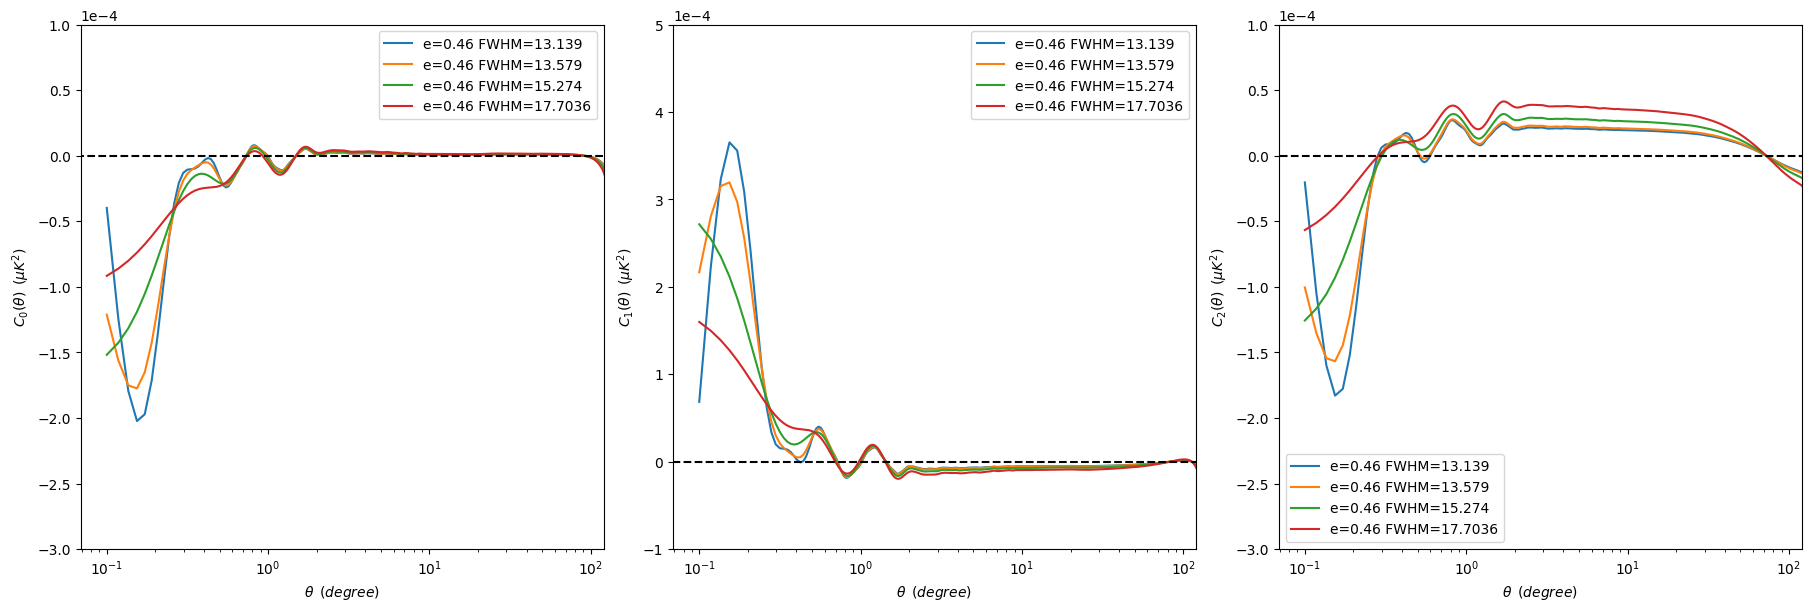

In [55]:
fig, axs = plt.subplots(1,3,figsize=(18, 6),layout='constrained')

ax=axs[0]
ax.set_xscale('log')
#ax.set_yscale('symlog')

for i in range(len(S)):
    ax.plot(theta_degree,alpha_0[i],label='e='+str(ec_array[i])+' FWHM='+str(FW[i]))

ax.set_xlim(0,120)
ax.set_ylim(-0.0003,0.0001)
ax.hlines(0,0,180,colors='k',linestyles='dashed')
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
#ax.set_title('C_0')
ax.set_xlabel(r'$\theta \,\,\, (degree)$ ' )
ax.set_ylabel(r'$C_0(\theta) \,\,\, (\mu K^2)$')
ax.legend()

ax=axs[1]
ax.set_xscale('log')
for i in range(len(S)):
    ax.plot(theta_degree,alpha_1[i],label='e='+str(ec_array[i])+' FWHM='+str(FW[i]))

ax.set_xlim(0,120)
ax.set_ylim(-0.0001,0.0005)
ax.hlines(0,0,180,colors='k',linestyles='dashed')
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
#ax.set_title('C_2')
ax.set_xlabel(r'$\theta \,\,\, (degree)$ ' )
ax.set_ylabel(r'$C_1(\theta) \,\,\, (\mu K^2)$')
ax.legend()

ax=axs[2]
ax.set_xscale('log')
for i in range(len(S)):
    ax.plot(theta_degree,alpha_2[i],label='e='+str(ec_array[i])+' FWHM='+str(FW[i]))

ax.set_xlim(0,120)
ax.set_ylim(-0.0003,0.0001)
ax.hlines(0,0,180,colors='k',linestyles='dashed')
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))

#ax.set_title('C_4')
ax.set_xlabel(r'$\theta \,\,\, (degree)$ ' )
ax.set_ylabel(r'$C_2(\theta) \,\,\, (\mu K^2)$')
ax.legend()
    
fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()
#fig.align_titles()

plt.show()
ax.get_figure().savefig('mBipoSH_constant_ecentricity.png',bbox_inches='tight',dpi=800)

# **Extras**

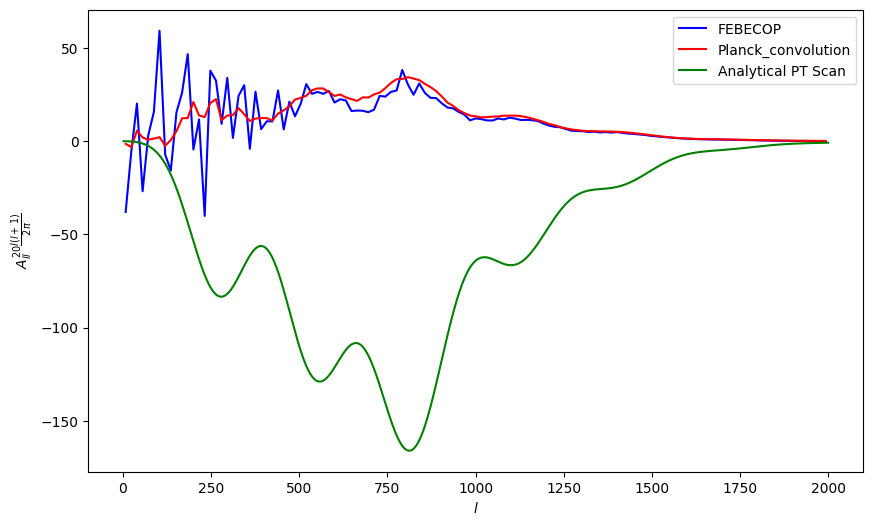

In [ ]:
fp_spec1_mean=np.loadtxt('./febecop/100_spec1_mean_fp.txt',delimiter=',')
sim_spec1_mean=np.loadtxt('./planck_conv/100_spec1_mean.txt',delimiter=',')
dl=16
l_bin=[dl/2+i*dl for i in range(int(len(fp_spec1_mean)/dl)+1)]
fp_bin1_mean=[np.mean(fp_spec1_mean[i:i+dl]) for i in range(0,len(fp_spec1_mean),dl)]
sim_bin1_mean=[np.mean(sim_spec1_mean[i:i+dl]) for i in range(0,len(sim_spec1_mean),dl)]
#bin1_std=[np.std(spec1_mean[i:i+dl]) for i in range(0,len(mean2),dl)]
plt.figure(figsize=(10, 6))
plt.plot(l_bin,fp_bin1_mean,color='blue',label='FEBECOP')
plt.plot(l_bin,sim_bin1_mean,color='red',label='Planck_convolution')
plt.plot(l_array,A20_ll,color='green',label='Analytical PT Scan')
#plt.errorbar(l_bin,bin1_mean,yerr=bin1_std,color='green',alpha=0.5)#,fmt='--')
plt.xlabel(r'$l$')
plt.ylabel(r'$A^{20}_{ll}\frac{l(l+1)}{2\pi}$')
plt.legend()

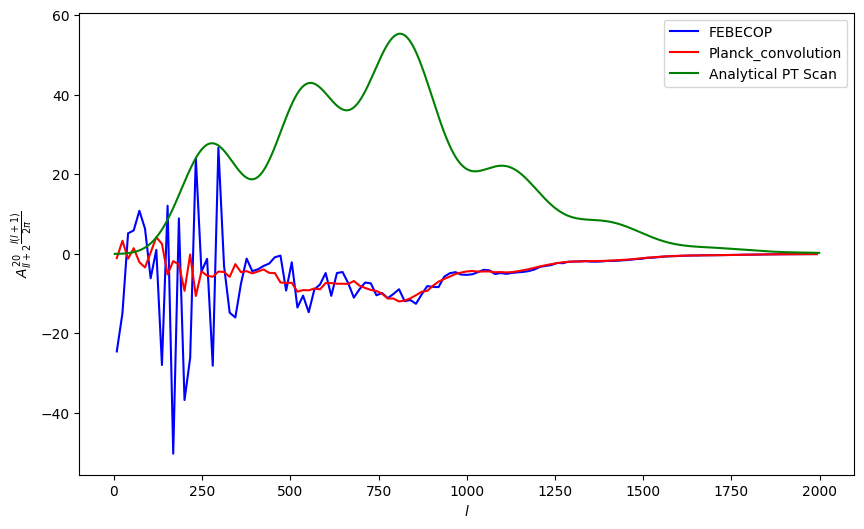

In [ ]:
fp_spec2_mean=np.loadtxt('./febecop/100_spec2_mean_fp.txt',delimiter=',')
sim_spec2_mean=np.loadtxt('./planck_conv/100_spec2_mean.txt',delimiter=',')
dl=16
l_bin=[dl/2+i*dl for i in range(int(len(fp_spec2_mean)/dl)+1)]
fp_bin2_mean=[np.mean(fp_spec2_mean[i:i+dl]) for i in range(0,len(fp_spec2_mean),dl)]
sim_bin2_mean=[np.mean(sim_spec2_mean[i:i+dl]) for i in range(0,len(sim_spec2_mean),dl)]
#bin1_std=[np.std(spec1_mean[i:i+dl]) for i in range(0,len(mean2),dl)]
plt.figure(figsize=(10, 6))
plt.plot(l_bin,fp_bin2_mean,color='blue',label='FEBECOP')
plt.plot(l_bin,sim_bin2_mean,color='red',label='Planck_convolution')
plt.plot(l_array,A20_ll2,color='green',label='Analytical PT Scan')

#plt.errorbar(l_bin,bin1_mean,yerr=bin1_std,color='green',alpha=0.5)#,fmt='--')
plt.xlabel(r'$l$')
plt.ylabel(r'$A^{20}_{ll+2}\frac{l(l+1)}{2\pi}$')
plt.legend()

Text(0, 0.5, '$\\ell(\\ell+1)\\tilde{A}^{20}_{\\ell \\ell+2}/2\\pi \\,\\, (\\mu K^2)$')

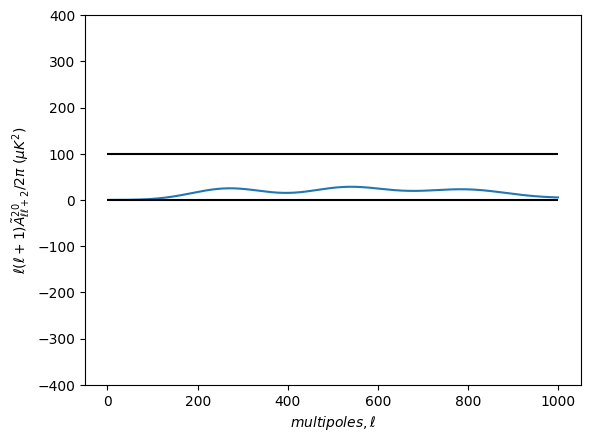

In [ ]:
#relating parallel transport scan to proper scan
def g_Ll1l(L,l1,l,f2_L0):
    g=[]
    const=Pi_l(L)*Pi_l(l)/Pi_l(l1)
    const=const/(4*np.pi)
    c=0
    for m in l:
        if m%100==0:
            print(m,'done')
        m1_array=np.array([i for i in range(0,m+1)])
        #print(m1_array)
        L_array=np.array([L[0] for i in range(0,m+1)])
        #print(L_array)
        l1_array=np.array([l1[c] for i in range(0,m+1)])
        #print(l1_array)
        l_array=np.array([m for i in range(0,m+1)])
        #print(l_array)
        array_2=np.array([2 for i in range(0,m+1)])
        #print(array_2)
        val=(py3nj.clebsch_gordan(2*L_array,2*l_array,2*l1_array,0,0,0)*py3nj.clebsch_gordan(2*L_array,2*l_array,2*l1_array,0,2*m1_array,2*m1_array,ignore_invalid=True)
             *py3nj.clebsch_gordan(2*l1_array,2*(l1_array+2),2*array_2,2*m1_array,-2*m1_array,0,ignore_invalid=True)*py3nj.clebsch_gordan(2*l_array,2*l1_array,2*array_2,2*m1_array,-2*m1_array,0,ignore_invalid=True))
        g.append(const[c]*np.sum(val))
        c=c+1
    g=np.array(g)
    g=g*f2_L0
    return g

In [ ]:
ones=np.array([1 for _ in range(len(l_array))])
#Pi_l(ones)*Pi_l(l_array)

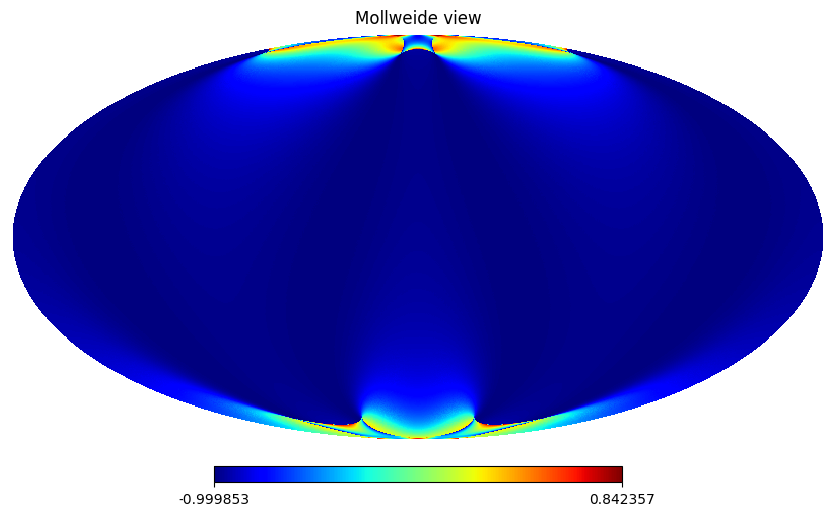

In [ ]:
import healpy as hp
map=np.loadtxt('cos_2rho_1024_final.txt')
hcount=np.loadtxt('hits_1024_final.txt')
map=map/hcount
hp.mollview(map,cmap='jet')

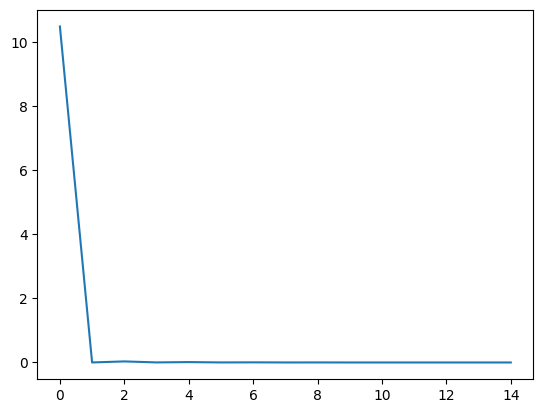

In [ ]:
f2l0=hp.anafast(map,lmax=1024)
plt.plot(np.arange(0,15,1),f2l0[0:15])

In [ ]:
f2_00=f2l0[0]
f2_20=f2l0[2]
print(f2_00,f2_20)

10.489349522200754 0.033153377418812455


In [ ]:
g0ll=g_Ll1l(0*ones,l_array,l_array,f2_00*ones)
print('g0ll done')
g2ll=g_Ll1l(2*ones,l_array,l_array,f2_20*ones)
print('g2ll done')
g2ll2=g_Ll1l(2*ones,l_array,l_array+2,f2_20*ones)
print('g2ll2 done')
g2l2l=g_Ll1l(2*ones,l_array+2,l_array,f2_20*ones)
print('g2l2l done')
g0ll2=g_Ll1l(0*ones,l_array,l_array+2,f2_00*ones)
print('g0ll2 done')

100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done
1100 done
1200 done
1300 done
1400 done
1500 done
1600 done
1700 done
1800 done
1900 done
g0ll done
100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done
1100 done
1200 done
1300 done
1400 done
1500 done
1600 done
1700 done
1800 done
1900 done
g2ll done
100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done
1100 done
1200 done
1300 done
1400 done
1500 done
1600 done
1700 done
1800 done
1900 done
2000 done
g2ll2 done
100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done
1100 done
1200 done
1300 done
1400 done
1500 done
1600 done
1700 done
1800 done
1900 done
g2l2l done
100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done
1100 done
1200 done
1300 done
1400 done
1500 done
1600 done
1700 done
1800 done
1900 done
2000 done
g0ll2 done


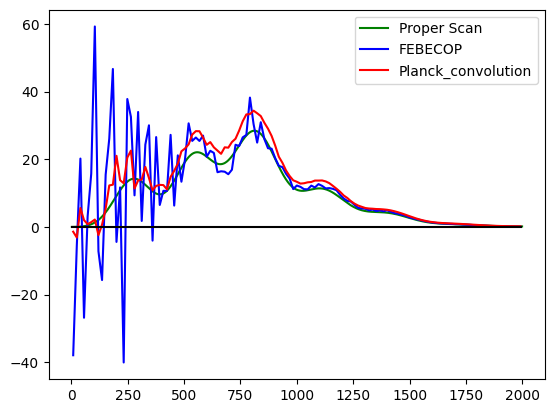

In [ ]:
A_ll_proper=(g0ll+g2ll)*A20_ll+(g2ll2+g2l2l)*A20_ll2
A_ll_proper.shape
plt.plot(l_array,A_ll_proper,color='green',label='Proper Scan')
plt.plot(l_bin,fp_bin1_mean,color='blue',label='FEBECOP')
plt.plot(l_bin,sim_bin1_mean,color='red',label='Planck_convolution')
plt.hlines(0,0,lmax,colors='black')
plt.legend()
#plt.hlines(100,0,lmax,colors='black')
#plt.ylim(-400,400)

In [ ]:
g0ll.shape

(998, 998)

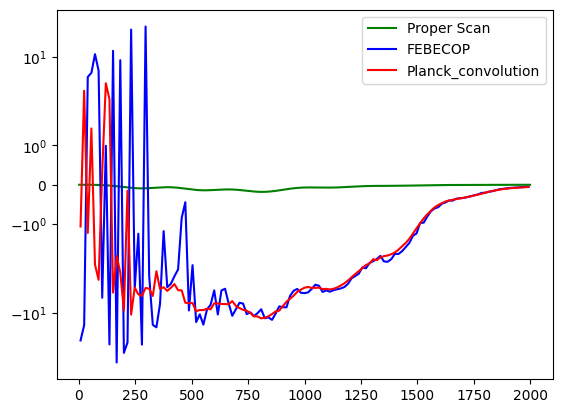

In [ ]:
A_ll2_proper=g2ll2*A20_ll+(g0ll2+g2ll)*A20_ll2
plt.plot(l_array,A_ll2_proper,color='green',label='Proper Scan')
plt.plot(l_bin,fp_bin2_mean,color='blue',label='FEBECOP')
plt.plot(l_bin,sim_bin2_mean,color='red',label='Planck_convolution')
#plt.hlines(0,0,lmax,colors='black')
plt.yscale('symlog')
plt.legend()
#plt.hlines(100,0,lmax,colors='black')
#plt.ylim(-400,400)

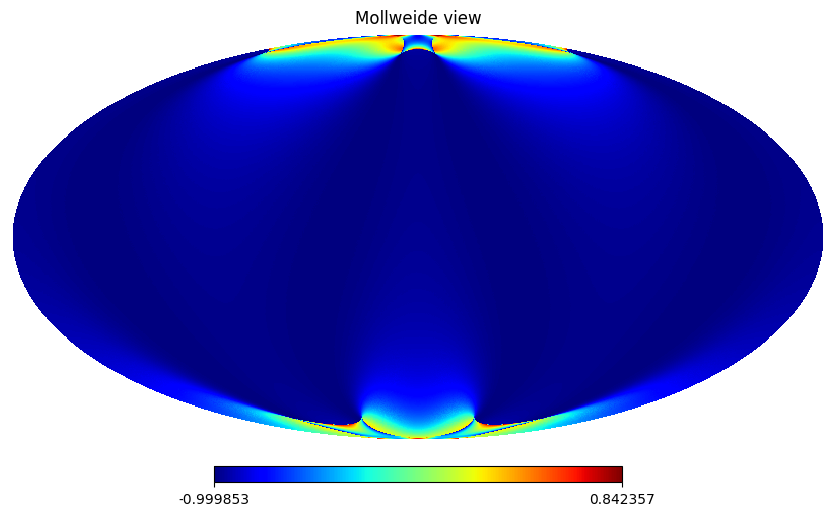

In [ ]:
import healpy as hp
map=np.loadtxt('cos_2rho_1024_final.txt')
hcount=np.loadtxt('hits_1024_final.txt')
map=map/hcount
hp.mollview(map,cmap='jet')

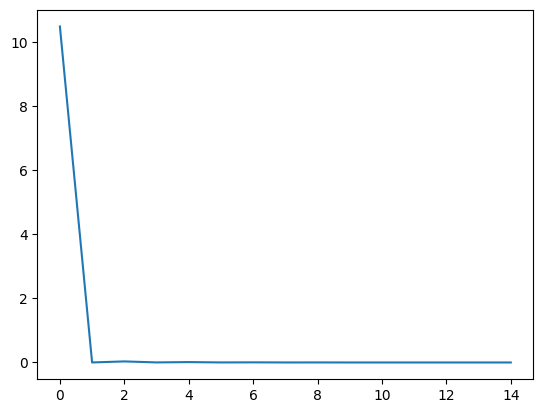

In [ ]:
f2l0=hp.anafast(map,lmax=1024)
plt.plot(np.arange(0,15,1),f2l0[0:15])

In [ ]:
f2_00=f2l0[0]
f2_20=f2l0[2]

In [ ]:
l_array=np.array([j for j in range(2,700)])
print(len(l_array))
l2=l_array-2
print(l2[2])
L_array=np.array([2 for i in range(len(l_array))])
zeros=np.array([0 for i in range(len(l_array))])
out0=py3nj.clebsch_gordan(2*l_array,2*l_array,2*L_array,0,0,0)
outnp0=py3nj.clebsch_gordan(2*l_array,2*l_array,2*L_array,zeros,zeros,zeros)
'''for l2_index in l2:
            array_l=np.array([l[id] for i in range(1,l2_index+1)])
            array_L=np.array([L for i in range(1,l2_index+1)])
            array_l2=np.array([l2_index for i in range(1,l2_index+1)])
            m2=np.array([m for m in range(1,l2_index+1)])'''

698
2


'for l2_index in l2:\n            array_l=np.array([l[id] for i in range(1,l2_index+1)])\n            array_L=np.array([L for i in range(1,l2_index+1)])\n            array_l2=np.array([l2_index for i in range(1,l2_index+1)])\n            m2=np.array([m for m in range(1,l2_index+1)])'

In [ ]:
out0

array([-0.53452248,  0.43643578, -0.37986859,  0.34139437, -0.31289311,
        0.29062786, -0.27258651,  0.25757004, -0.24481103,  0.23379133,
       -0.22414626,  0.21561045, -0.20798543,  0.20111933, -0.19489362,
        0.18921426, -0.18400553,  0.17920565, -0.17476368,  0.17063715,
       -0.16679032,  0.16319292, -0.15981906,  0.15664647, -0.15365588,
        0.15083051, -0.14815566,  0.14561841, -0.14320734,  0.14091232,
       -0.13872432,  0.13663527, -0.13463791,  0.13272573, -0.13089284,
        0.12913389, -0.12744405,  0.1258189 , -0.12425441,  0.12274691,
       -0.121293  ,  0.11988959, -0.11853382,  0.11722305, -0.11595484,
        0.11472694, -0.11353726,  0.11238385, -0.1112649 ,  0.11017874,
       -0.10912379,  0.10809859, -0.10710176,  0.10613201, -0.10518815,
        0.10426903, -0.10337361,  0.10250087, -0.10164987,  0.10081973,
       -0.1000096 ,  0.0992187 , -0.09844628,  0.09769162, -0.09695406,
        0.09623297, -0.09552773,  0.09483777, -0.09416255,  0.09

In [ ]:
out0-outnp0

In [ ]:
l_array=np.array([j for j in range(2,700)])
B00_ll=B_L0_ll(0,l_array,l_array,ec,s)
B20_ll=B_L0_ll(2,l_array,l_array,ec,s)
B20_ll2=B_L0_ll(2,l_array,l_array+2,ec,s)


100 done_for B00_ll
200 done_for B00_ll
300 done_for B00_ll
400 done_for B00_ll
500 done_for B00_ll
600 done_for B00_ll


In [ ]:
k=1.0
type(k)

float

In [ ]:
B20_ll_2=B_L0_ll(2,l_array+2,l_array,ec,s)

[  4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 25

In [ ]:
print(B20_ll_2)

[ 1.69476399e-07 -8.50757560e-07  2.40901143e-06 -5.26430270e-06
  9.88449082e-06 -1.67810563e-05  2.65057871e-05 -3.96480803e-05
  5.68327000e-05 -7.87178760e-05  1.05993669e-04 -1.39380540e-04
  1.79628096e-04 -2.27513958e-04  2.83842756e-04 -3.49445208e-04
  4.25177288e-04 -5.11919454e-04  6.10575944e-04 -7.22074114e-04
  8.47363832e-04 -9.87416903e-04  1.14322653e-03 -1.31580682e-03
  1.50619230e-03 -1.71543745e-03  1.94461630e-03 -2.19482203e-03
  2.46716654e-03 -2.76278010e-03  3.08281103e-03 -3.42842530e-03
  3.80080622e-03 -4.20115417e-03  4.63068622e-03 -5.09063590e-03
  5.58225289e-03 -6.10680274e-03  6.66556661e-03 -7.25984103e-03
  7.89093761e-03 -8.56018285e-03  9.26891783e-03 -1.00184981e-02
  1.08102932e-02 -1.16456868e-02  1.25260763e-02 -1.34528725e-02
  1.44274995e-02 -1.54513947e-02  1.65260082e-02 -1.76528029e-02
  1.88332544e-02 -2.00688504e-02  2.13610908e-02 -2.27114877e-02
  2.41215647e-02 -2.55928572e-02  2.71269121e-02 -2.87252875e-02
  3.03895527e-02 -3.21212

In [ ]:
CG(2,1,2,-1,0,0).doit()

-sqrt(5)/5

In [ ]:
k=[]
L1=2000
for i in range(0,L1):
    cg2=(CG(L1,(-i),L1,i,2,0).doit()).doit()
    k.append(cg2.evalf())


In [ ]:
py3nj.clebsch_gordan?

Signature:
py3nj.clebsch_gordan(
    two_j1,
    two_j2,
    two_j3,
    two_m1,
    two_m2,
    two_m3,
    ignore_invalid=False,
)
Docstring:
Calulate Clebsch-Gordan coefficient
<j1 m1, j2 m2 | j3 m3>

Parameters
----------
two_j1: array of integers
two_j2: array of integers
two_j3: array of integers
two_m1: array of integers
two_m2: array of integers
two_m3: array of integers
    Since j1, ..., m3 should be integers or half integers, two_j1 (which
    means 2 x j1) should be all integers.
force_compute: boolean
    If True, returns 0 even for invalid arguments.
    Otherwise, raise a ValueError.

Returns
-------
clebch-gordan: array
    The value of Clebsch Gordan coefficients, with the same size of the
    arguments.
File:      ~/.local/lib/python3.8/site-packages/py3nj/wigner.py
Type:      function

In [ ]:
#L1=2000
l1_arr=np.array([L1 for i in range(0,L1)])
m=np.array([i for i in range(0,L1)])
L=np.array([2 for i in range(0,L1)])
M=np.array([0 for i in range(0,L1)])
cg_out=py3nj.clebsch_gordan(2*l1_arr,2*l1_arr,2*L,-2*m,2*m,2*M)


In [ ]:
print(k)
print(cg_out)

[-0.0176754618914531, 0.0176754486414816, -0.0176754088915673, 0.0176753426417102, -0.0176752498919101, 0.0176751306421672, -0.0176749848924815, 0.0176748126428529, -0.0176746138932814, 0.0176743886437670, -0.0176741368943098, 0.0176738586449097, -0.0176735538955667, 0.0176732226462809, -0.0176728648970522, 0.0176724806478807, -0.0176720698987663, 0.0176716326497090, -0.0176711689007088, 0.0176706786517658, -0.0176701619028799, 0.0176696186540512, -0.0176690489052796, 0.0176684526565651, -0.0176678299079077, 0.0176671806593075, -0.0176665049107644, 0.0176658026622785, -0.0176650739138497, 0.0176643186654780, -0.0176635369171635, 0.0176627286689061, -0.0176618939207058, 0.0176610326725627, -0.0176601449244767, 0.0176592306764478, -0.0176582899284761, 0.0176573226805615, -0.0176563289327040, 0.0176553086849037, -0.0176542619371605, 0.0176531886894744, -0.0176520889418455, 0.0176509626942737, -0.0176498099467590, 0.0176486306993015, -0.0176474249519011, 0.0176461927045579, -0.017644933957

In [ ]:
j=1
print(k[j],cg_out[j],k-cg_out)

0.0176754486414816 0.01767544864148164 [3.46944695195361e-18 -3.46944695195361e-18 0 ... 6.93889390390723e-18
 -6.93889390390723e-18 0]
